# INT303 Big Data Analysis

**Student Name:** Jiahui.Hu
**Student ID:** 2252518

---

**Python Version** 3.9.6

## 1. Data Overview/Exploratory Analysis

In this section, you will load the dataset, perform initial checks, and understand its basic structure.

In [1]:
conda install kagglehub

Jupyter detected...
2 channel Terms of Service accepted
Channels:
 - defaults
Platform: osx-arm64
doneecting package metadata (repodata.json): - 
doneing environment: \ 


==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


### 1.1 Package Setup & Data Loading

- Install and import core libraries for data handling, visualization, and modeling (pandas, numpy, matplotlib, seaborn, scikit-learn).
- Use Kaggle API to download `loan_approval_dataset.csv` and load it into a pandas DataFrame.
- Ensure the file path is correct and the dataset is loaded without errors.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


import kagglehub
import pandas as pd
# Download dataset and get local path
path = kagglehub.dataset_download("architsharma01/loan-approval-prediction-dataset")
# Build full file path and load CSV into a DataFrame
file_path = path + "/loan_approval_dataset.csv"
df= pd.read_csv(file_path)


### 1.2 Basic Structure, Missing Values & Duplicates

- Display the first few rows (`head()`) to get a quick sense of column meanings and value ranges.
- Use `info()` and `dtypes` to inspect:
  - Number of non-null entries per column
  - Inferred data types
  - Overall dataset size and memory usage
- Compute missing value counts and ratios for each column to check data completeness.
- Show descriptive statistics (`describe()`, with extended percentiles) for numeric features to understand:
  - Central tendency (mean, median)
  - Spread (std, IQR)
  - Potential outliers (low/high percentiles)
- Count the number of completely duplicated rows to verify data quality.

In [3]:
# 1) Preview the first few rows
print("Preview (head):")
display(df.head(5))

# 2) Check DataFrame structure and dtypes
print("\nDataFrame info:")
print(df.info())

print("\nColumn dtypes:")
print(df.dtypes)

# 3) Identify missing values (count and ratio)
na_count = df.isna().sum()
na_ratio = df.isna().mean().round(4)
missing_df = (
    pd.DataFrame({
        "missing_count": na_count,
        "missing_ratio": na_ratio,
    })
    .sort_values("missing_count", ascending=False)
)

print("\nMissing values per column:")
display(missing_df)

# 4) Summary statistics for numeric columns
print("\nDescriptive statistics (numeric columns):")
display(
    df.select_dtypes(include=["number"])
      .describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])
      .transpose()
)

# 5) Check for duplicate rows
dup_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {dup_count}")

if dup_count > 0:
    # Display duplicated rows if any exist
    display(df[df.duplicated()])

Preview (head):


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected



DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ K

,missing_count,missing_ratio
loan_id,0,0.0
no_of_dependents,0,0.0
education,0,0.0
self_employed,0,0.0
income_annum,0,0.0
loan_amount,0,0.0
loan_term,0,0.0
cibil_score,0,0.0
residential_assets_value,0,0.0
commercial_assets_value,0,0.0



Descriptive statistics (numeric columns):


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,43.68,214.4,1068.0,2135.0,3202.0,4055.6,4226.32,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,0.00,0.0,1.0,3.0,4.0,5.0,5.00,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,300000.00,600000.0,2700000.0,5100000.0,7500000.0,9400000.0,9800000.00,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,700000.00,1800000.0,7700000.0,14500000.0,21500000.0,30900000.0,35700000.00,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,2.00,2.0,6.0,10.0,16.0,20.0,20.00,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,304.00,330.0,453.0,600.0,748.0,869.0,894.32,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,0.00,300000.0,2200000.0,5600000.0,11300000.0,21260000.0,25400000.00,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,0.00,200000.0,1300000.0,3700000.0,7600000.0,13900000.0,16732000.00,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,700000.00,1900000.0,7500000.0,14600000.0,21700000.0,31300000.0,36032000.00,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,200000.00,500000.0,2300000.0,4600000.0,7100000.0,11100000.0,13100000.00,14700000.0



Number of duplicate rows: 0


From the initial structure and quality checks, I observe the following:

- **Dataset size and shape:** The dataset contains 4,269 rows and 13 columns. This is a reasonably sized sample for exploring relationships and training baseline machine learning models.
- **Data types:** Most columns are stored as integer or numeric types, with two columns (`education`, `self_employed`) stored as categorical (`object`) variables, and `loan_status` as the target label.
- **Missing values:** According to the missing-value summary, there are **no missing values** in any column in this sample dataset (0 missing and 0% missing ratio for all features). This simplifies preprocessing, although in a larger real-world dataset we would expect non‑trivial missingness.
- **Duplicate rows:** The duplicate‑row check indicates that there are **no fully duplicated observations**. Each loan application appears to be unique.
- **Basic distributions:** The descriptive statistics suggest that all numeric columns have plausible ranges (e.g., non‑negative income, loan amount and asset values; CIBIL scores roughly between 300 and 900).

Overall, the raw dataset is clean and complete for this sample. In later sections, I still implement generic missing‑value handling and robustness checks so that the preprocessing pipeline can scale to larger, more realistic datasets where missing data and inconsistencies are more likely to occur.

## 2. Exploratory Data Analysis (EDA) & Visualization

In this section, I explore the dataset through descriptive statistics and visualizations.  
I start with **univariate EDA**, examining the marginal distributions of individual numeric and categorical features.  
Then I move to **target‑aware EDA**, analyzing how features relate to the loan approval outcome (`loan_status`).  
Together, these steps provide intuition about data quality, variable distributions, potential outliers, and the strength and direction of relationships with the target.

### 2.0 Setup for Univariate Visualization (Column Selection & Light Cleaning)

- Configure the Seaborn plotting style using a white-grid theme and a slightly enlarged font size.
- Define two column groups:
  - `num_cols`: key numeric variables such as income, loan amount, loan term, credit score, and asset values.
  - `cat_cols`: main categorical variables (`education`, `self_employed`).
- Keep only those columns that actually exist in the current dataset, making the code robust to column changes.
- Create a lightweight copy of the original DataFrame called `df_vis` for plotting only.
- For each numeric column in `df_vis`, replace `+inf` and `-inf` with `NaN` so that histograms, KDEs and boxplots can be computed safely without numerical issues.

In [4]:
sns.set(style="whitegrid", font_scale=1.0)

# Numerical columns (keep original names including leading spaces)
num_cols = [
    " income_annum", " loan_amount", " loan_term", " cibil_score",
    " residential_assets_value", " commercial_assets_value",
    " luxury_assets_value", " bank_asset_value"
]
# Keep only columns that actually exist in df
num_cols = [c for c in num_cols if c in df.columns]

# Categorical columns
cat_cols = [" education", " self_employed"]
cat_cols = [c for c in cat_cols if c in df.columns]

# Create a lightweight copy used only for visualization
df_vis = df.copy()

# Replace +/- inf with NaN in numeric columns to avoid plotting issues
for c in num_cols:
    df_vis[c] = df_vis[c].replace([np.inf, -np.inf], np.nan)

### 2.1 Numeric Features – Histograms with KDE

- For each numeric column in `num_cols`, draw a histogram with an overlaid KDE curve using the cleaned `df_vis` copy.
- The plots are arranged in a grid layout (up to 3 columns per row) to provide a compact overview of all numeric distributions.
- For every feature, compute:
  - number of non-missing observations (`n`)
  - missing value ratio (`miss`)
- These statistics are displayed in the subplot titles, helping to quickly assess both the distribution shape and data completeness.
- This step focuses on identifying skewness, heavy tails, and potential outliers in each numeric variable.

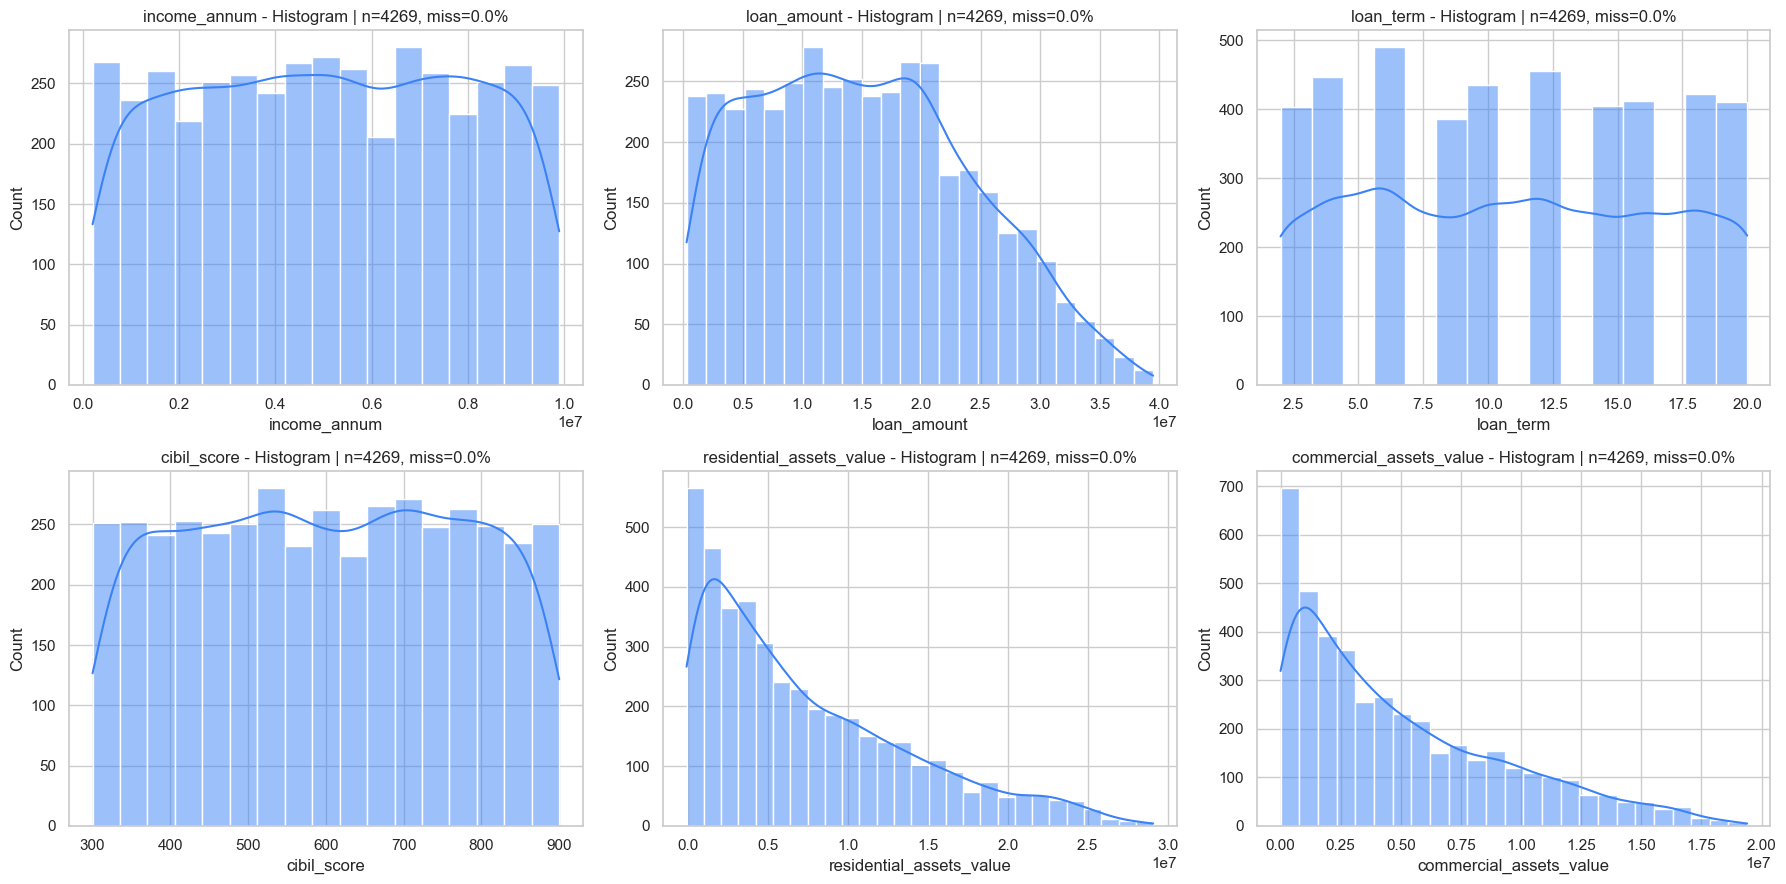

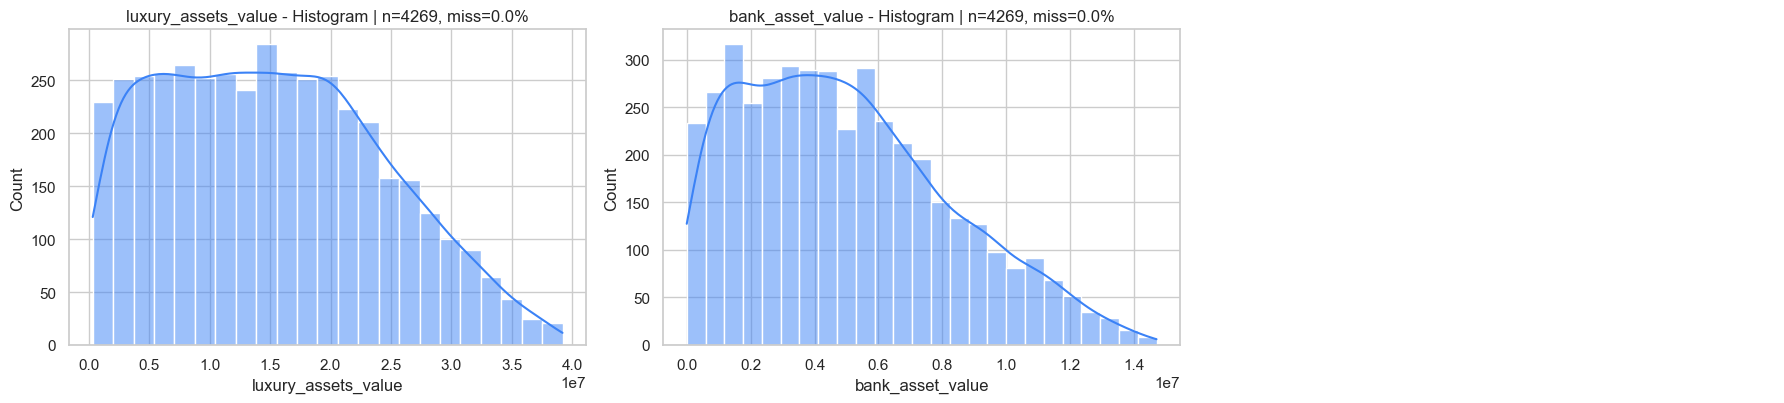

In [5]:
if num_cols:
    # Plot up to 6 numeric features per page
    k = min(6, len(num_cols))
    fig, axes = plt.subplots(2, 3, figsize=(18, 9))
    axes = axes.ravel()

    for i, col in enumerate(num_cols[:6]):
        x = df_vis[col]
        sns.histplot(x.dropna(), kde=True, ax=axes[i], color="#3b82f6")
        n = x.notna().sum()
        miss = x.isna().mean()
        axes[i].set_title(
            f"{col.strip()} - Histogram | n={n}, miss={miss:.1%}"
        )
        axes[i].set_xlabel(col.strip())
        axes[i].set_ylabel("Count")

    # Turn off unused subplots if fewer than 6 columns
    for j in range(k, 6):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

    # Paginate if there are more than 6 numeric columns
    if len(num_cols) > 6:
        rest = num_cols[6:]
        rows = int(np.ceil(len(rest) / 3))
        fig, axes = plt.subplots(rows, 3, figsize=(18, 4.2 * rows))
        axes = np.array(axes).reshape(rows, 3)

        for i, col in enumerate(rest):
            r, c = divmod(i, 3)
            x = df_vis[col]
            sns.histplot(x.dropna(), kde=True, ax=axes[r, c], color="#3b82f6")
            n = x.notna().sum()
            miss = x.isna().mean()
            axes[r, c].set_title(
                f"{col.strip()} - Histogram | n={n}, miss={miss:.1%}"
            )
            axes[r, c].set_xlabel(col.strip())
            axes[r, c].set_ylabel("Count")

        # Turn off remaining empty axes
        for j in range(i + 1, rows * 3):
            r, c = divmod(j, 3)
            axes[r, c].axis("off")

        plt.tight_layout()
        plt.show()

Key observations from the histograms and KDE curves:

- **Right‑skewed variables:** `income_annum`, `loan_amount` and all asset‑related features (`residential_assets_value`, `commercial_assets_value`, `luxury_assets_value`, `bank_asset_value`) are strongly right‑skewed with long upper tails. A small fraction of loans have very large incomes or asset values compared with the majority of applicants.
- **Loan term:** `loan_term` shows a discrete distribution over a limited set of values (e.g., 5, 10, 15, 20 years), which is expected for typical loan products.
- **CIBIL score:** `cibil_score` is concentrated roughly between 300 and 900 and appears closer to a uniform or mildly bell‑shaped distribution, without obvious extreme outliers.
- **Outliers:** The heavy right tails in the amount and asset variables indicate the presence of extreme values which could disproportionately influence models that are sensitive to scale (e.g., linear models). This motivates the later use of winsorization and optional log transformations.

These univariate patterns provide an early indication that we should treat skewed financial amounts with care in the preprocessing pipeline.

### 2.2 Numeric Features – Boxplots (Outlier Inspection)

- Using the same `num_cols`, draw boxplots to visually inspect the spread and potential outliers of each numeric feature.
- Subplots are again organized in a 3-column grid for compact comparison across variables.
- For every feature, report:
  - number of non-missing observations
  - missing value ratio
- Boxplots highlight extreme values and long tails that may not be clear from histograms alone, providing complementary evidence for outlier handling in later preprocessing.

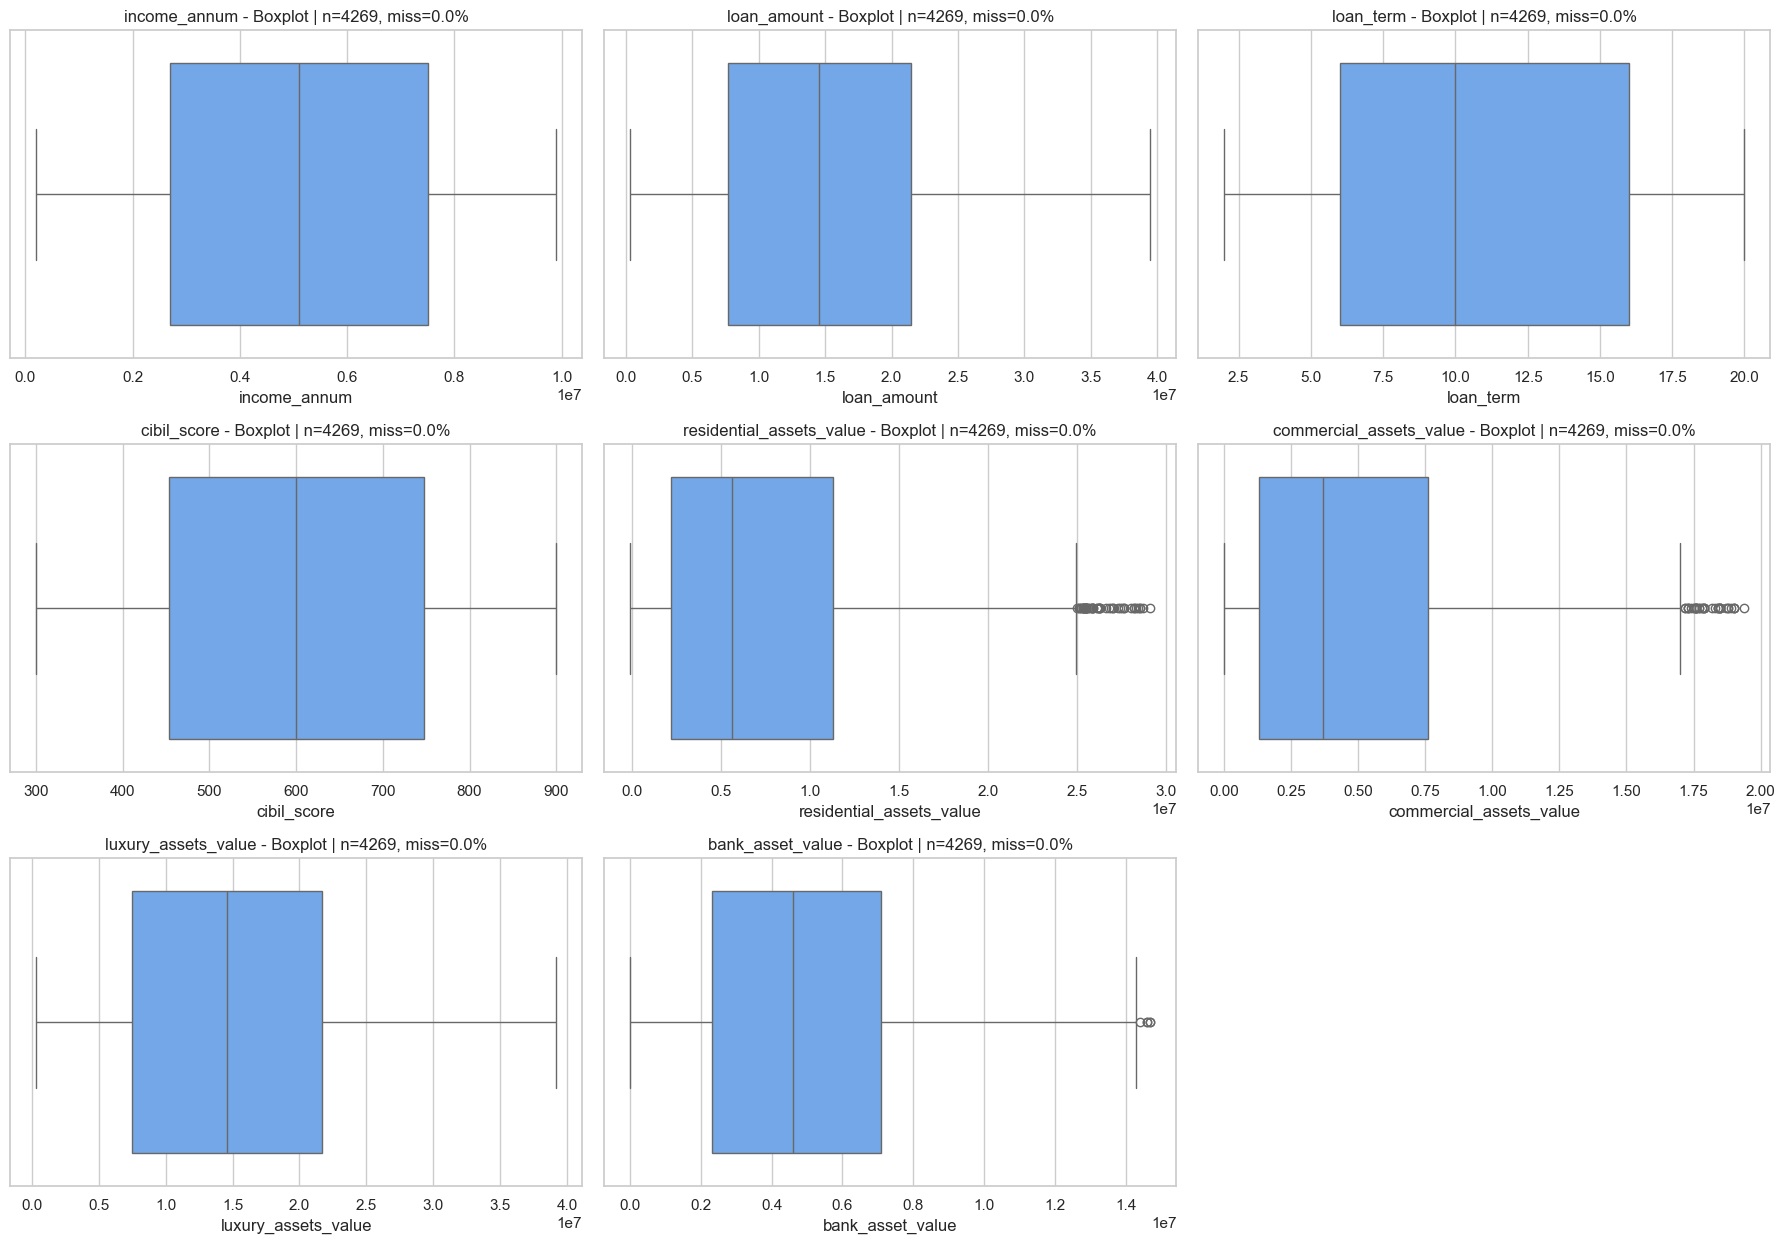

In [6]:
if num_cols:
    rows = int(np.ceil(len(num_cols) / 3))
    fig, axes = plt.subplots(rows, 3, figsize=(18, 4.2 * rows))
    axes = np.array(axes).reshape(rows, 3)

    for i, col in enumerate(num_cols):
        r, c = divmod(i, 3)
        x = df_vis[col]
        sns.boxplot(
            x=x,
            ax=axes[r, c],
            color="#60a5fa",
            showfliers=True  # show potential outliers explicitly
        )
        n = x.notna().sum()
        miss = x.isna().mean()
        axes[r, c].set_title(
            f"{col.strip()} - Boxplot | n={n}, miss={miss:.1%}"
        )
        axes[r, c].set_xlabel(col.strip())

    # Turn off remaining empty axes if grid is larger than number of columns
    for j in range(i + 1, rows * 3):
        r, c = divmod(j, 3)
        axes[r, c].axis("off")

    plt.tight_layout()
    plt.show()

The boxplots confirm the following:

- **Extreme values:** Amount‑type variables (income, loan amount, and the different asset values) contain a number of points far above the upper whisker, indicating statistically extreme values.
- **Robustness considerations:** While these outliers may be genuine high‑value customers, they can have a large influence on summary statistics and on some machine learning models. This further supports the decision to apply clipping (winsorization) and log transformation to stabilize these distributions.
- **Loan term and CIBIL score:** `loan_term` and `cibil_score` show comparatively fewer extreme outliers; their spreads are moderate and well‑behaved.

Overall, the numeric features are usable as they are, but some scale normalization and outlier‑handling steps are desirable before model training.

### 2.3 Categorical Features – Annotated Bar Charts

- For each categorical feature in `cat_cols` (e.g., `education`, `self_employed`):
  - Convert values to string, replace missing values with a dedicated `<missing>` label, and strip whitespace.
  - Compute category counts and plot a bar chart (countplot) ordered by frequency.
- Graph enhancements:
  - Use a pastel color palette and hide the legend to keep the chart clean.
  - Extend the y-axis slightly above the maximum count to leave room for annotations.
  - Narrow each bar to make the chart visually compact.
  - Annotate every bar with both:
    - absolute count
    - percentage of total observations for that feature.
- This reveals whether each categorical variable is balanced or dominated by a few categories, guiding later encoding and potential category grouping.

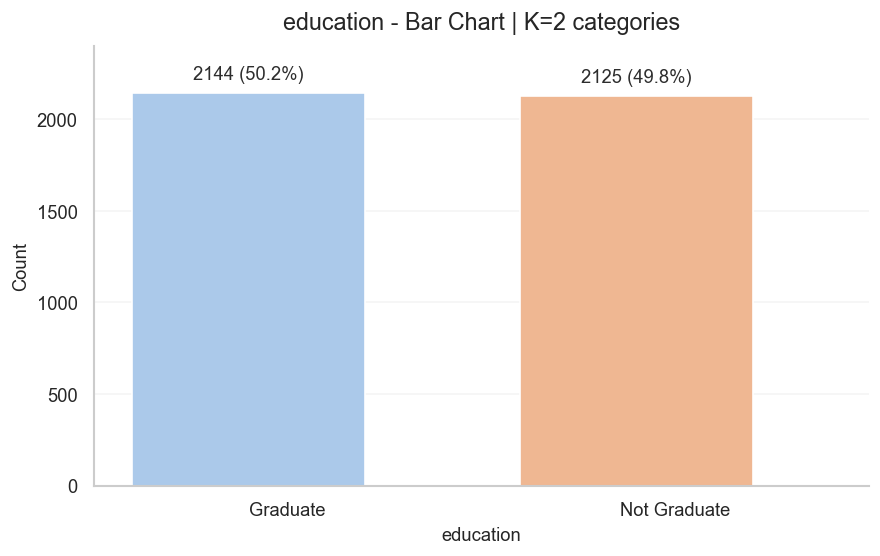

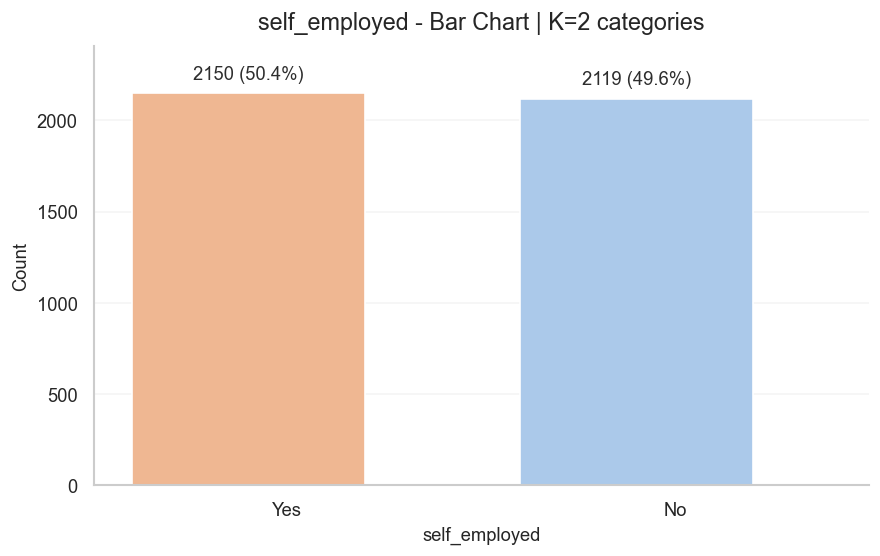

In [7]:
for col in cat_cols:
    plt.figure(figsize=(7.5, 4.8), dpi=120)

    # Convert to string, keep "<missing>" for NA, and strip whitespace
    ser = df_vis[col].astype("object")
    ser = ser.where(ser.notna(), "<missing>").astype(str).str.strip()

    # Use category frequency as the ordering
    order = ser.value_counts().index
    k = len(order)

    # Pastel color palette with k unique colors
    pal = sns.color_palette("pastel", n_colors=k)

    ax = sns.countplot(
        x=ser,
        order=order,
        hue=ser,
        legend=False,
        palette=pal
    )

    ax.set_title(f"{col.strip()} - Bar Chart | K={k} categories",
                 fontsize=14, pad=10)
    ax.set_xlabel(col.strip(), fontsize=11)
    ax.set_ylabel("Count", fontsize=11)

    # Annotate each bar with count and percentage
    ymax = ser.value_counts().max()
    ax.set_ylim(0, ymax * 1.12)
    for bar in ax.patches:
        bar.set_width(0.6)

    total = len(ser)
    for p in ax.patches:
        count = int(p.get_height())
        pct = 100 * count / total if total else 0
        ax.annotate(
            f"{count} ({pct:.1f}%)",
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha="center",
            va="bottom",
            fontsize=11,
            xytext=(0, 6),
            textcoords="offset points",
            color="#2d2d2d"
        )

    ax.grid(axis="y", alpha=0.2)
    sns.despine(top=True, right=True)
    plt.tight_layout()
    plt.show()

From the bar charts for `education` and `self_employed`:

- **Balanced categories:** Both categorical variables are almost perfectly balanced. For `education`, the proportions of **Graduate** vs **Not Graduate** are close to 50% each. For `self_employed`, the proportions of **Yes** vs **No** are also roughly 50/50.
- **Implications for modeling:** Because the categories are balanced, we do not expect severe class imbalance issues within these features themselves. Simple one‑hot encoding should be sufficient; there is no need for rare‑category grouping or target‑frequency smoothing.
- **Missing values:** In this sample dataset, there are no explicit `<missing>` values for these categorical features, so we do not need additional imputation strategies beyond basic string cleaning.

These characteristics make the categorical features straightforward to handle in the preprocessing pipeline.

### 2.4 Log-transformed Numeric Features – Histograms

- Focus on heavily right-skewed numeric features:  
  `income_annum`, `loan_amount`, `residential_assets_value`,  
  `commercial_assets_value`, `luxury_assets_value`, `bank_asset_value`.
- Keep only positive and finite values for each feature, then apply a `log1p` transformation (`np.log1p`) for visualization.
- Plot histograms with KDE curves of the log-transformed values in a 2×3 grid.
- Each subplot title reports the number of valid observations used.
- The goal is to check whether log transformation makes these distributions more symmetric and well-behaved, which is useful for downstream preprocessing and modeling decisions.

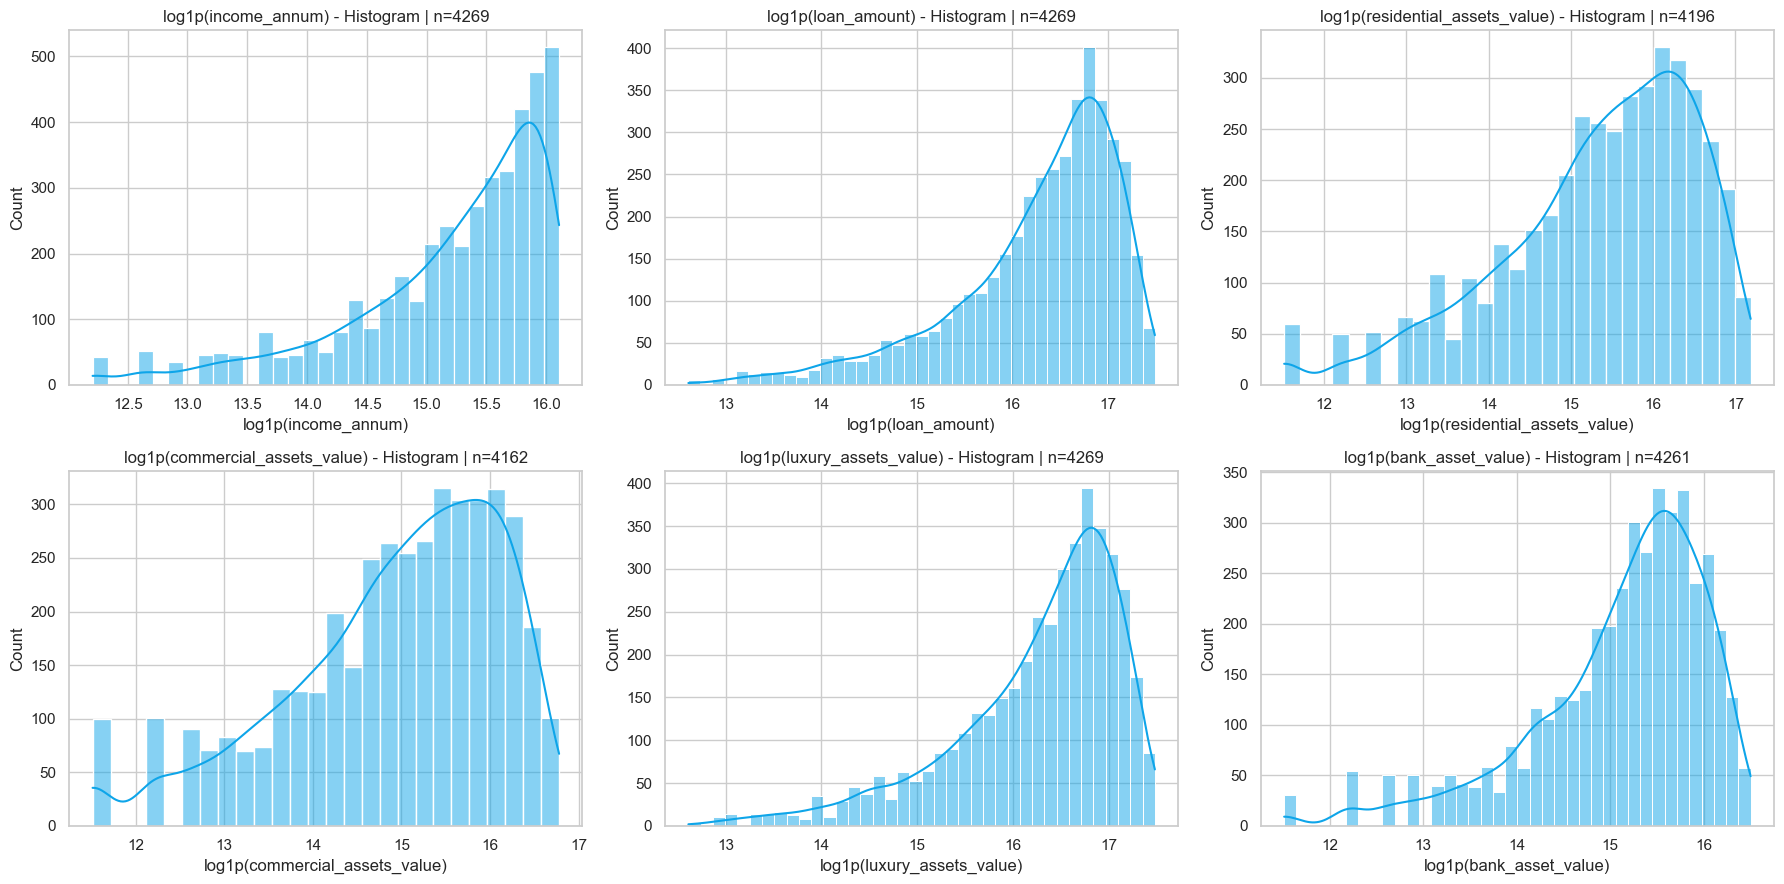

In [8]:
log_cols = [
    " income_annum", " loan_amount",
    " residential_assets_value", " commercial_assets_value",
    " luxury_assets_value", " bank_asset_value"
]
log_cols = [c for c in log_cols if c in df_vis.columns]

if log_cols:
    fig, axes = plt.subplots(2, 3, figsize=(18, 9))
    axes = axes.ravel()

    for i, col in enumerate(log_cols[:6]):
        x = df_vis[col]
        # Keep positive and finite values before log transform
        x = x[(x > 0) & np.isfinite(x)]

        sns.histplot(
            np.log1p(x),
            kde=True,
            ax=axes[i],
            color="#0ea5e9"
        )
        axes[i].set_title(
            f"log1p({col.strip()}) - Histogram | n={x.shape[0]}"
        )
        axes[i].set_xlabel(f"log1p({col.strip()})")
        axes[i].set_ylabel("Count")

    # Turn off unused subplots if fewer than 6 log_cols
    for j in range(len(log_cols[:6]), 6):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

For the heavily right‑skewed numeric features (`income_annum`, `loan_amount`, and the asset values), the log‑transformed histograms show:

- **Reduced skewness:** Applying a log transformation makes the distributions more symmetric and compact, compressing the extreme upper tail while preserving the relative order of observations.
- **Better separation of the bulk:** The majority of observations, which previously occupied a narrow range close to zero, are now spread out more evenly on the log scale. This can help models capture meaningful variation in the mid‑range rather than being dominated by very large values.
- **Interpretability:** Many financial quantities (such as income and wealth) are naturally multiplicative; modeling them on a log scale often aligns better with economic intuition.

Because of these benefits, I later apply a combination of percentile‑based clipping and log transformation to these skewed variables in the preprocessing step.

### 2.5 Target Distribution & Numeric Features by Loan Status

- Use `loan_status` as the binary target variable.
- First, clean the target column:
  - Convert to string, replace missing values with a `<missing>` label, and trim whitespace.
- Plot the **overall class distribution** of `loan_status`:
  - Show the number of observations per class as a bar chart.
  - Annotate each bar with both absolute count and percentage.
- Then, for each numeric feature in `num_cols`, draw **boxplots grouped by loan status**:
  - One subplot per feature in a grid layout.
  - Titles include the number of non-missing observations and the missing-value ratio.
- These plots reveal:
  - Whether the target classes are balanced.
  - How medians, variability, and outliers of numeric features differ between approved and rejected loans.

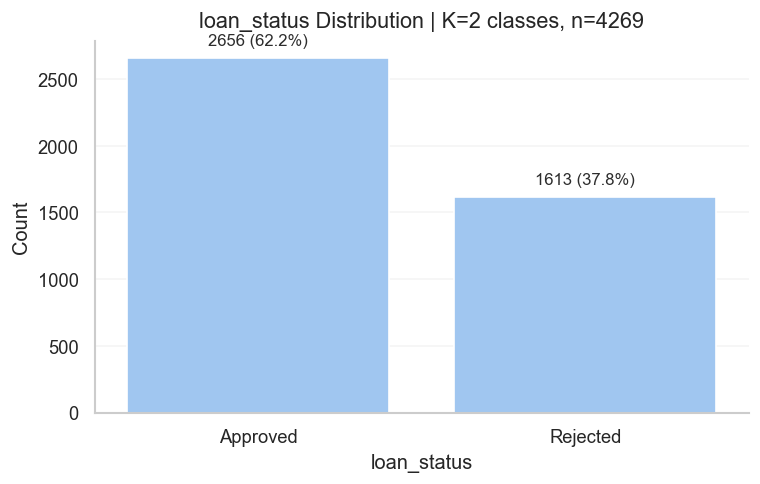

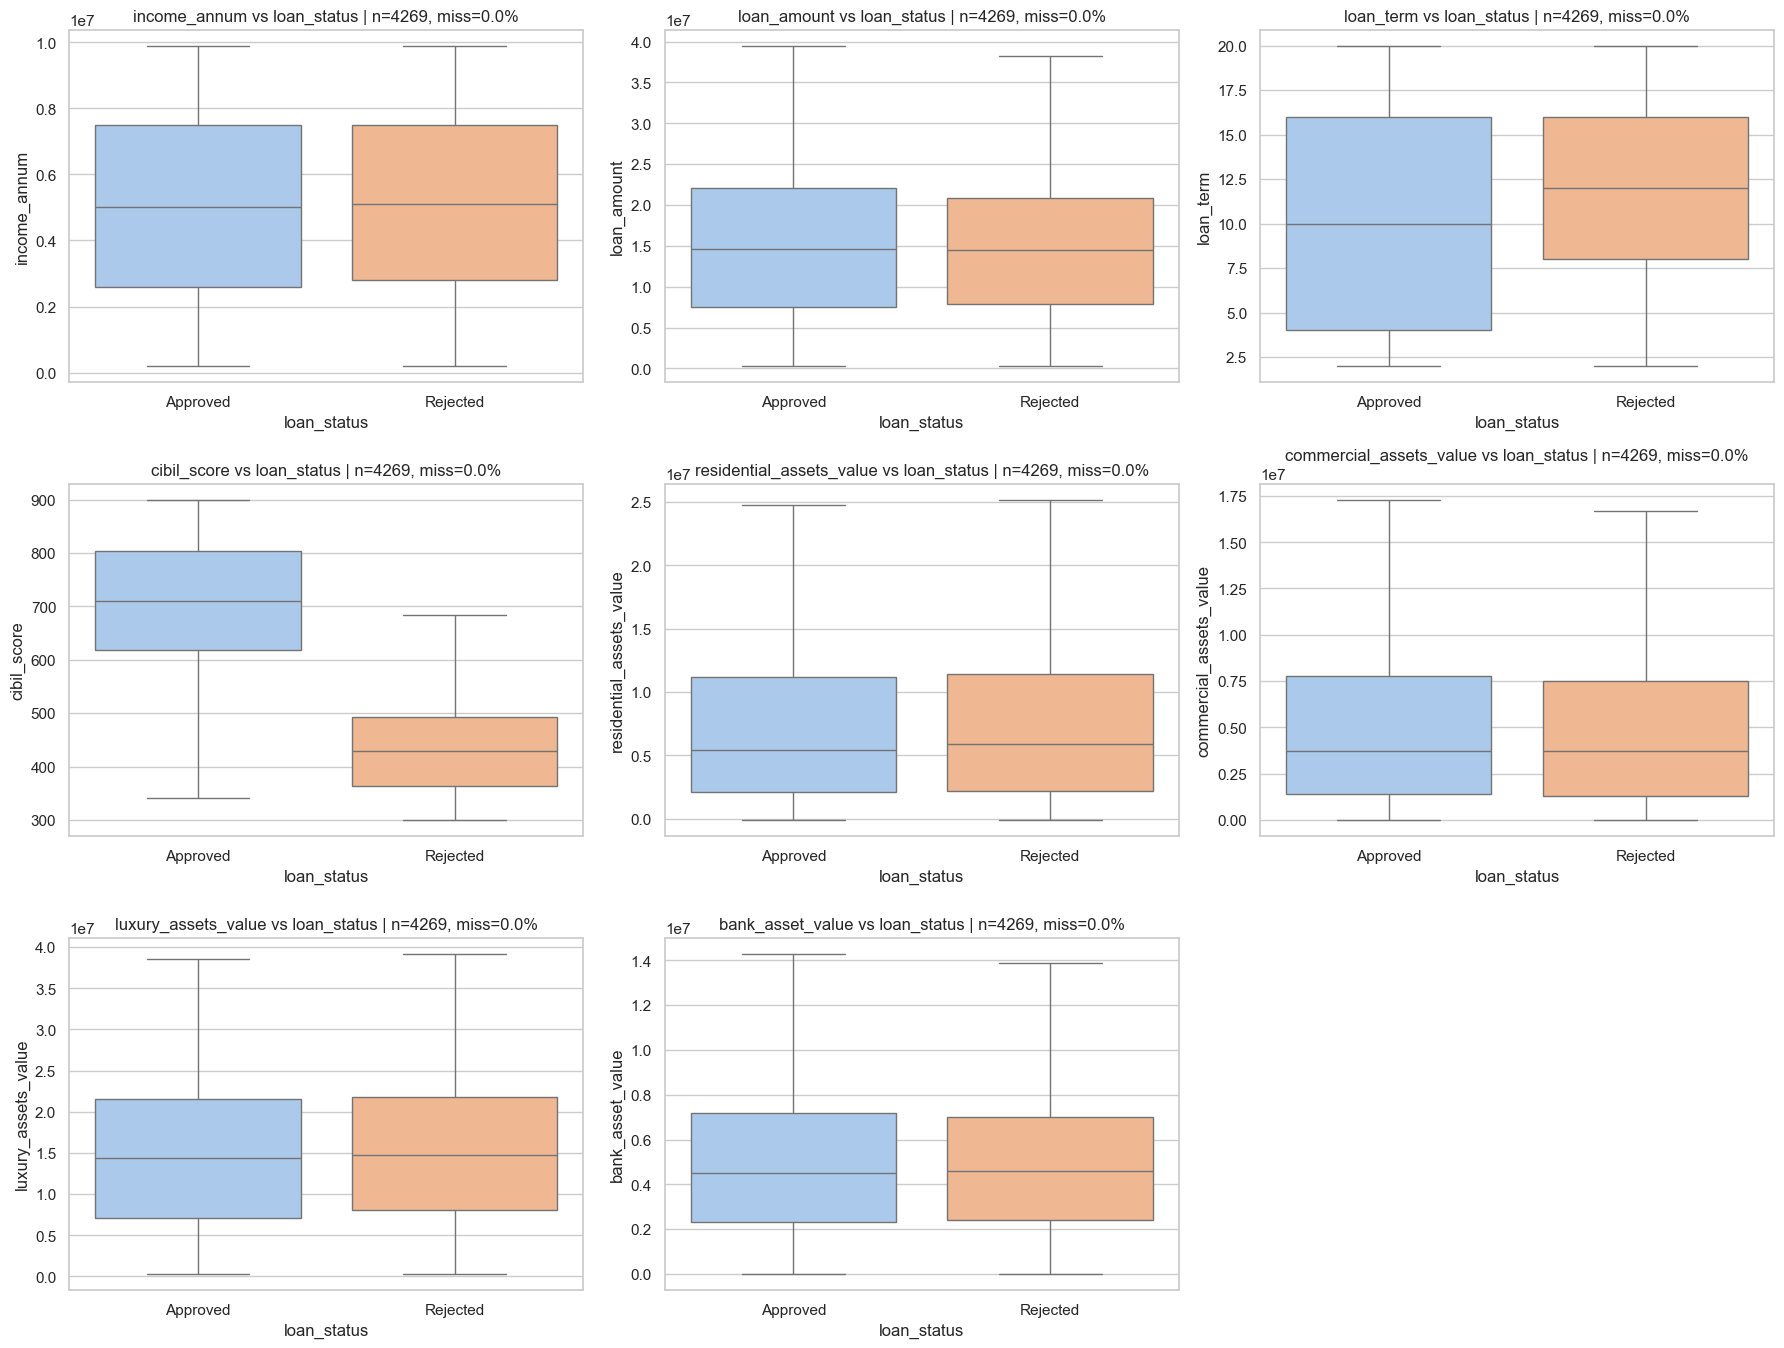

In [9]:
target_col = ' loan_status'

# Ensure the target column exists
assert target_col in df_vis.columns, "Target column ' loan_status' not found. Please check the column name."

# Clean target column for visualization: cast to string, strip spaces, mark missing as '<missing>'
df_vis[target_col] = (
    df_vis[target_col].astype('object')
    .where(df_vis[target_col].notna(), '<missing>')
    .astype(str).str.strip()
)

# Target distribution (bar chart)
plt.figure(figsize=(6.5, 4.2), dpi=120)

# Order target classes by frequency
order_target = df_vis[target_col].value_counts().index

ax = sns.countplot(
    x=df_vis[target_col],
    order=order_target,
    color="#93c5fd"
)

ax.set_title(
    f"{target_col.strip()} Distribution | "
    f"K={len(order_target)} classes, n={len(df_vis)}",
    fontsize=13, pad=8
)
ax.set_xlabel(target_col.strip())
ax.set_ylabel("Count")

total = len(df_vis)
for p in ax.patches:
    count = int(p.get_height())
    pct = 100 * count / total if total else 0
    ax.annotate(
        f"{count} ({pct:.1f}%)",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center", va="bottom",
        fontsize=10, xytext=(0, 6),
        textcoords="offset points",
        color="#2d2d2d"
    )

ax.grid(axis='y', alpha=0.2)
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

# Numeric features vs target: boxplots (compare medians / IQR)
if num_cols:
    rows = int(np.ceil(len(num_cols) / 3))
    fig, axes = plt.subplots(rows, 3, figsize=(18, 4.6 * rows))
    axes = np.array(axes).reshape(rows, 3)

    for i, col in enumerate(num_cols):
        r, c = divmod(i, 3)

        # Use rows where both this numeric column and target are not missing
        data_i = df_vis[[col, target_col]].dropna(subset=[col])
        n_i = data_i.shape[0]
        miss_i = df_vis[col].isna().mean()

        sns.boxplot(
            data=data_i,
            x=target_col,
            y=col,
            hue=target_col,          # same as x (avoids FutureWarning)
            hue_order=order_target,  # keep class order consistent
            legend=False,
            ax=axes[r, c],
            showcaps=True,
            showfliers=False,        # hide extreme outliers
            palette="pastel"         # soft color palette
        )

        axes[r, c].set_title(
            f"{col.strip()} vs {target_col.strip()} "
            f"| n={n_i}, miss={miss_i:.1%}"
        )
        axes[r, c].set_xlabel(target_col.strip())
        axes[r, c].set_ylabel(col.strip())

        # Safety: if seaborn still creates a legend, remove it
        if axes[r, c].legend_ is not None:
            axes[r, c].legend_.remove()

    # Turn off empty subplots (if grid is larger than number of columns)
    for j in range(i + 1, rows * 3):
        r, c = divmod(j, 3)
        axes[r, c].axis('off')

    plt.tight_layout()
    plt.show()

Based on the target distribution and the boxplots of numeric features grouped by `loan_status`:

- **Target balance:** The target variable is moderately imbalanced, with about **62% Approved** and **38% Rejected** applications. This is not extremely skewed, but it is important to keep in mind when evaluating models (e.g., using precision/recall and F1 score in addition to accuracy).
- **CIBIL score:** Approved applicants have noticeably **higher CIBIL scores** on average than rejected applicants, with relatively little overlap in the lower score range. This suggests that `cibil_score` is likely to be a highly informative predictor of loan approval.
- **Income and loan amount:** Approved loans tend to be associated with **slightly higher incomes and moderately higher loan amounts**, although the difference between classes is less pronounced than for `cibil_score`.
- **Asset values:** Asset‑related features show mild shifts between approved and rejected groups, indicating that higher asset values are somewhat associated with approvals, but the effect appears weaker and more variable.

These patterns provide early hints about which numeric variables may have the strongest relationship with the loan approval outcome.

### 2.6 Key Numeric Features vs Loan Status – KDE Plots

- Focus on a subset of informative numeric features:
  - `cibil_score`, `income_annum`, `loan_amount` (if available).
- For each selected feature:
  - Plot kernel density estimates (KDE) **separately for each loan status class**.
  - Use a shared x‑axis scale to make the two distributions directly comparable.
  - Report the number of non-missing values and missing-value ratio in the title.
- These KDE plots highlight how the distribution of each key numeric feature shifts between approved and rejected loans, giving an early indication of their discriminative power.

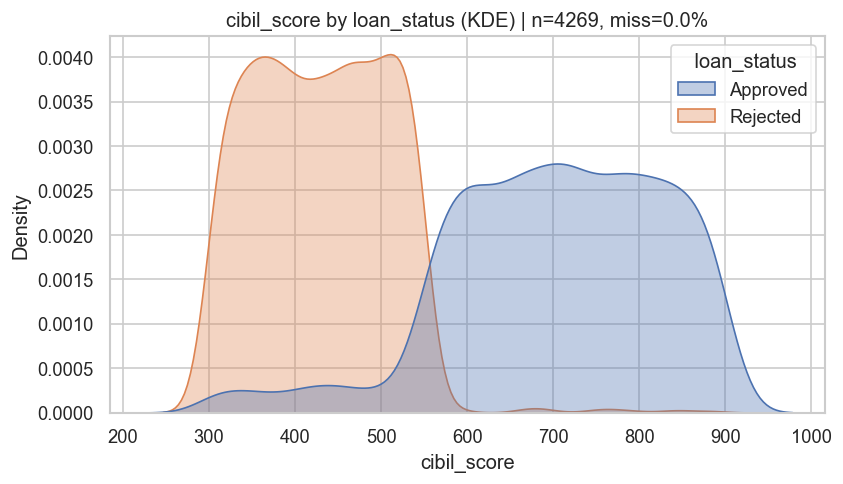

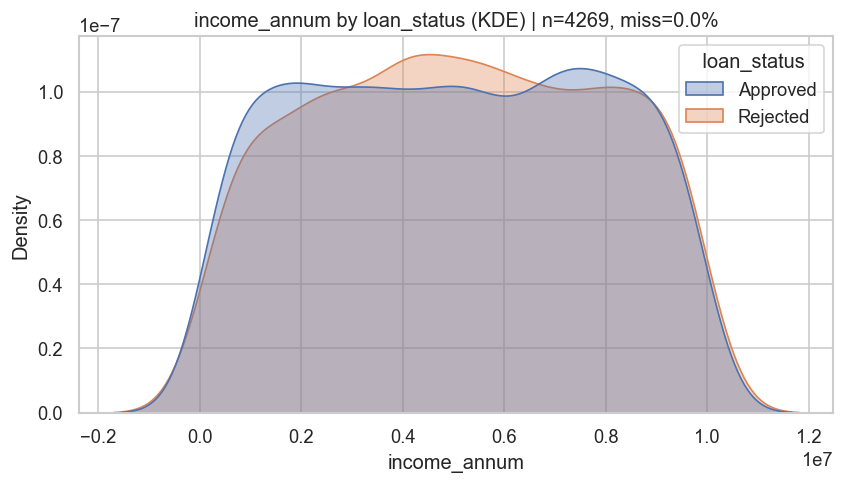

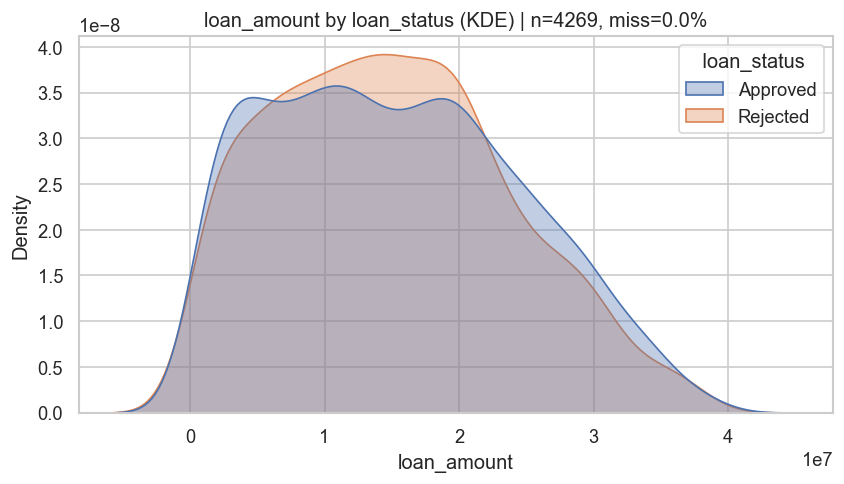

In [10]:
# Focus on a few key numeric features for KDE comparison
kde_focus = [
    c for c in [" cibil_score", " income_annum", " loan_amount"]
    if c in num_cols
]

for col in kde_focus:
    plt.figure(figsize=(7.2, 4.2), dpi=120)

    # Keep rows where this numeric column is not missing
    data_i = df_vis[[col, target_col]].dropna(subset=[col])

    sns.kdeplot(
        data=data_i,
        x=col,
        hue=target_col,
        hue_order=order_target,
        fill=True,
        common_norm=False,   # groups not forced to equal total area
        alpha=0.35
    )

    n_i = data_i.shape[0]
    miss_i = df_vis[col].isna().mean()

    plt.title(
        f"{col.strip()} by {target_col.strip()} (KDE) "
        f"| n={n_i}, miss={miss_i:.1%}"
    )
    plt.xlabel(col.strip())
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()

The class‑conditional KDE plots for selected numeric features reveal:

- **CIBIL score:** The density for **Approved** loans is concentrated at higher CIBIL scores, whereas **Rejected** loans are concentrated at lower scores. The two curves have relatively limited overlap, reinforcing the view that credit score is a strong discriminator between the two classes.
- **Income:** The KDEs for `income_annum` show substantial overlap between Approved and Rejected groups. While higher incomes may slightly increase the likelihood of approval, income alone does not cleanly separate the two classes.
- **Loan amount:** The distributions of `loan_amount` for Approved and Rejected loans are also highly overlapping, with some indication that rejected loans may be more frequent at higher requested amounts.

Overall, among these variables, `cibil_score` appears to be the most powerful single predictor, while income and loan amount likely contribute in combination with other features rather than individually.

### 2.7 Categorical Features vs Loan Status – Counts and Class Proportions

- For each categorical variable in `cat_cols` (e.g., `education`, `self_employed`):
  - Clean the categories (convert to string, replace missing values with `<missing>`, strip spaces).
  - Build a cross‑tabulation between the categorical feature and `loan_status`.
- Two complementary visualizations are produced:
  1. **Grouped count bar chart**
     - Shows the number of observations for each (category, loan_status) pair.
     - Bars are grouped by category and colored by loan status, with counts annotated.
  2. **Stacked proportion bar chart**
     - For each category, stack bars by loan status and display the **within‑category proportions**.
     - This makes approval rates across different categories easy to compare.
- These plots reveal which categorical features are most associated with the target and where strong approval/rejection biases exist.

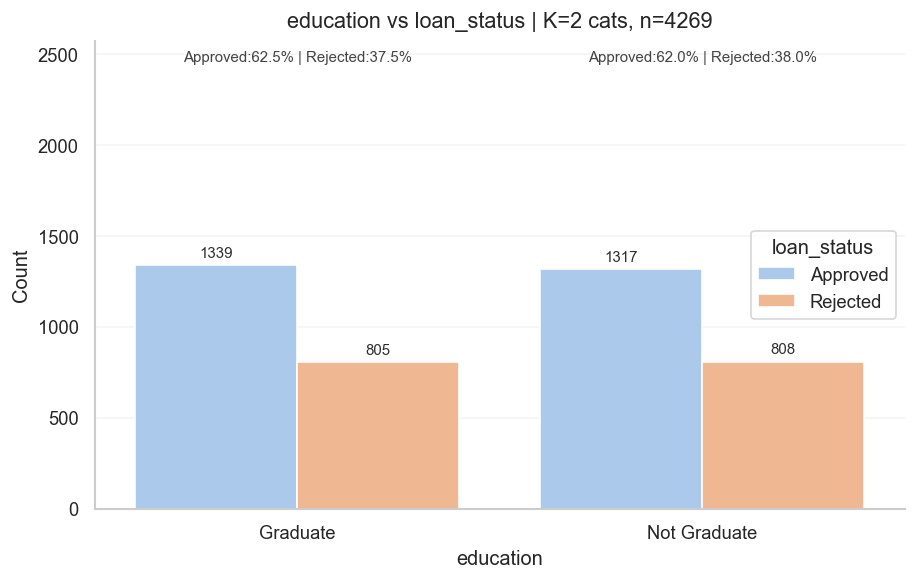

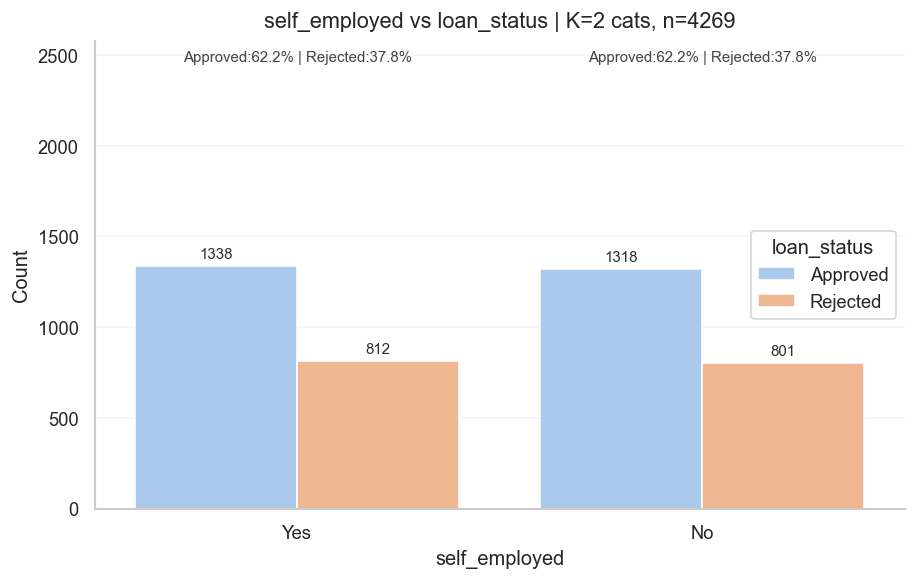

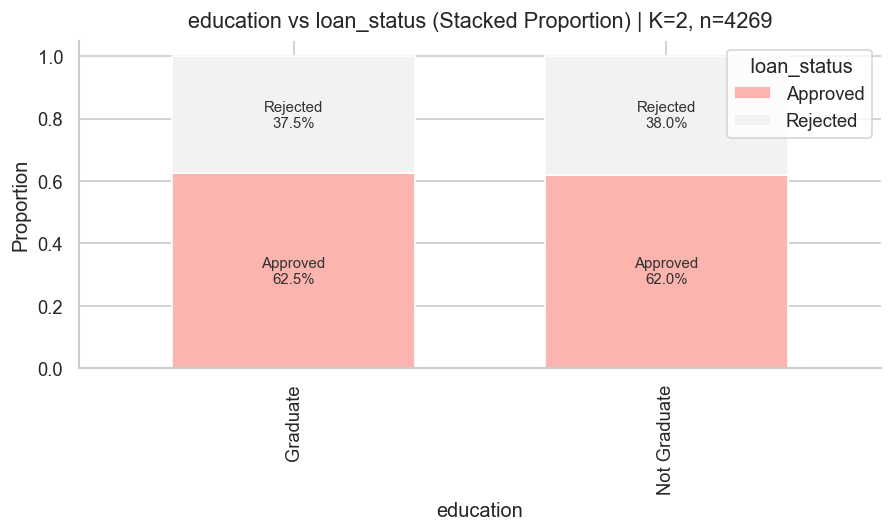

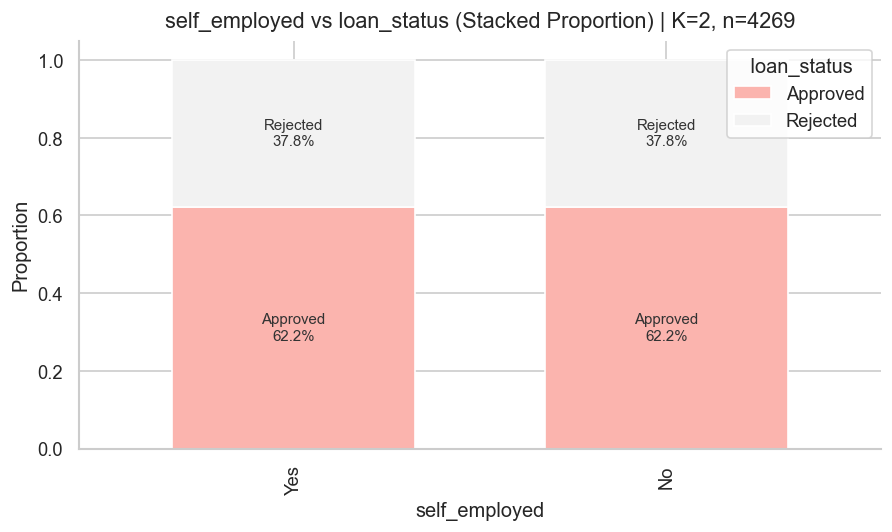

In [11]:
# Method A: grouped bar charts
for col in cat_cols:
    plt.figure(figsize=(7.8, 5.0), dpi=120)

    # Convert to string, replace missing values with '<missing>', strip spaces
    ser_cat = (
        df_vis[col]
        .astype('object')
        .where(df_vis[col].notna(), '<missing>')
        .astype(str)
        .str.strip()
    )

    # Temporary DataFrame combining this categorical feature and the target
    temp = pd.DataFrame({col: ser_cat, target_col: df_vis[target_col]})

    # Category order (by frequency)
    order_cat = ser_cat.value_counts().index
    k = len(order_cat)

    # Color palette for different target classes
    pal = sns.color_palette("pastel", n_colors=len(order_target))

    # Grouped bar chart: counts per (category, target) combination
    ax = sns.countplot(
        data=temp,
        x=col,
        order=order_cat,
        hue=target_col,
        hue_order=order_target,
        palette=pal
    )

    ax.set_title(
        f"{col.strip()} vs {target_col.strip()} | K={k} cats, n={len(temp)}",
        fontsize=13,
        pad=8
    )
    ax.set_xlabel(col.strip())
    ax.set_ylabel("Count")

    # Compute target‑class proportions within each category
    grp = (
        temp.groupby([col, target_col]).size()
        / temp.groupby(col).size()
    ).unstack().reindex(order_cat)[order_target]

    # Add a bit of headroom at the top of the plot
    ymax = temp.groupby(col).size().max() * 1.2
    ax.set_ylim(0, ymax)

    # Add count label on top of each bar
    for p in ax.patches:
        h = p.get_height()
        if h > 0:
            ax.annotate(
                f"{int(h)}",
                (p.get_x() + p.get_width() / 2, h),
                ha="center",
                va="bottom",
                fontsize=9,
                xytext=(0, 3),
                textcoords="offset points",
                color="#2d2d2d"
            )

    # For each category, show target‑class percentages above the bars
    for xi, cat in enumerate(order_cat):
        if cat in grp.index:
            txt = " | ".join(
                [f"{k}:{grp.loc[cat, k] * 100:.1f}%" for k in grp.columns]
            )
            ax.text(
                xi,
                ymax * 0.98,
                txt,
                ha="center",
                va="top",
                fontsize=9,
                color="#444"
            )

    ax.legend(title=target_col.strip(), frameon=True)
    ax.grid(axis='y', alpha=0.2)
    sns.despine(top=True, right=True)
    plt.tight_layout()
    plt.show()


# Method B: stacked bar charts (column-wise proportions)
for col in cat_cols:
    # Convert to string, replace missing values with '<missing>', strip spaces
    ser_cat = (
        df_vis[col]
        .astype('object')
        .where(df_vis[col].notna(), '<missing>')
        .astype(str)
        .str.strip()
    )

    # Temporary DataFrame combining this categorical feature and the target
    temp = pd.DataFrame({col: ser_cat, target_col: df_vis[target_col]})

    # Category order (by frequency)
    order_cat = ser_cat.value_counts().index

    # Proportion of each target class within each category level
    prop = (
        temp.groupby([col, target_col]).size()
        / temp.groupby(col).size()
    ).unstack().reindex(order_cat)[order_target]

    plt.figure(figsize=(7.6, 4.6), dpi=120)

    # 100% stacked bar chart for within‑category proportions
    prop.plot(
        kind='bar',
        stacked=True,
        colormap='Pastel1',
        ax=plt.gca(),
        width=0.65
    )

    plt.title(
        f"{col.strip()} vs {target_col.strip()} (Stacked Proportion) "
        f"| K={len(order_cat)}, n={len(temp)}",
        fontsize=13,
        pad=8
    )
    plt.xlabel(col.strip())
    plt.ylabel("Proportion")
    plt.ylim(0, 1.05)

    # Add percentage labels inside stacked segments
    for i_bar, (idx, row) in enumerate(prop.iterrows()):
        cum = 0.0
        for k in order_target:
            val = row.get(k, 0.0)
            if val > 0.02:  # Only label segments > 2% to avoid clutter
                plt.text(
                    i_bar,
                    cum + val / 2,
                    f"{k}\n{val * 100:.1f}%",
                    ha='center',
                    va='center',
                    fontsize=9,
                    color="#333"
                )
            cum += val

    sns.despine(top=True, right=True)
    plt.tight_layout()
    plt.show()

The grouped and stacked bar charts for `education` and `self_employed` versus `loan_status` show:

- **Similar approval rates across categories:** The approval proportions are very similar between **Graduate** and **Not Graduate** applicants, and likewise between **self‑employed** and **non‑self‑employed** applicants (around 62% Approved and 38% Rejected in each subgroup).
- **Limited discriminatory power:** Because the approval/rejection split is almost identical across categories, these variables are unlikely to be strong standalone predictors of loan status. They may still provide value in interaction with numeric features, but their marginal effect appears small.
- **Fairness considerations:** The roughly equal approval rates across education and employment‑type groups suggest that, at least in this sample, the lending policy does not strongly favor one of these categories over the other.

As a result, I expect these categorical variables to contribute modestly to model performance after one‑hot encoding, but not to drive decisions on their own.

### 2.8 Numeric Feature Interactions & Correlation with Loan Status

This subsection has two parts:

1. **Scatter plots of numeric pairs colored by loan status**
   - For a few intuitive numeric pairs (e.g. `income_annum` vs `loan_amount`, `loan_amount` vs `cibil_score`), draw scatter plots with points colored by `loan_status`.
   - Optionally clip extreme values (based on percentiles) to avoid over‑compression of the bulk of points.
   - These plots help visualize separability of classes in 2‑D feature space and detect simple interaction patterns.

2. **Correlation matrix & approximate point‑biserial correlation**
   - Compute the Pearson correlation matrix among numeric features and visualize it using a heatmap.
   - Map `loan_status` to a numeric 0/1 variable and compute the Pearson correlation between each numeric feature and the target (an approximation of point‑biserial correlation).
   - Summarize these correlations in a table sorted by absolute magnitude to highlight features most strongly associated with approval outcome.

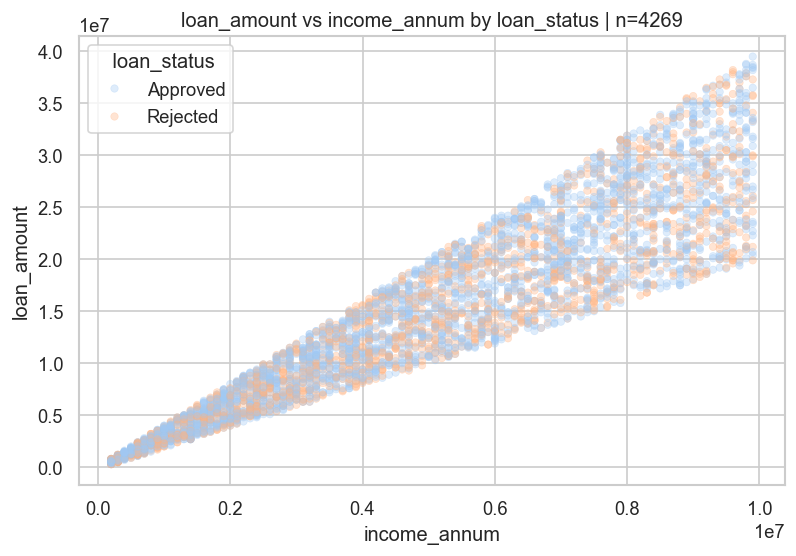

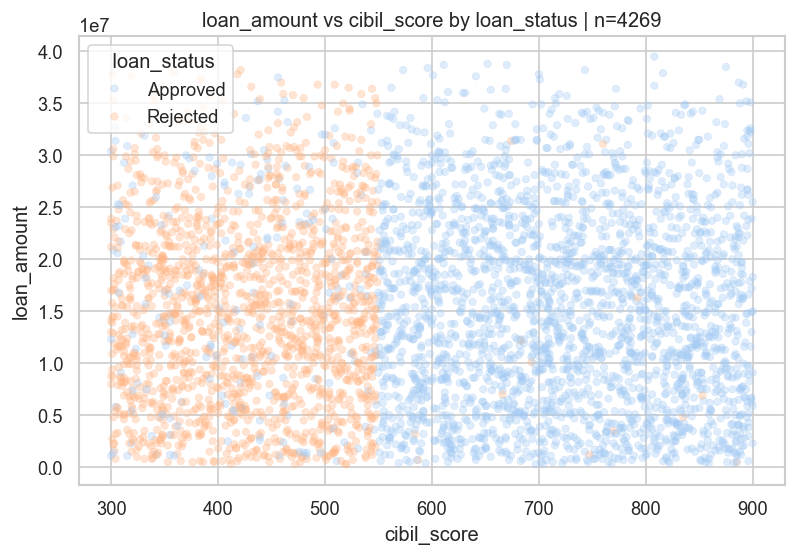

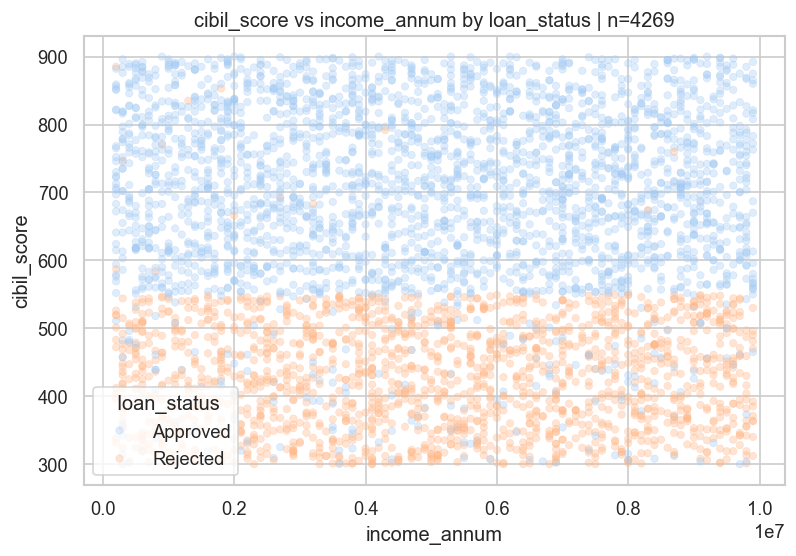

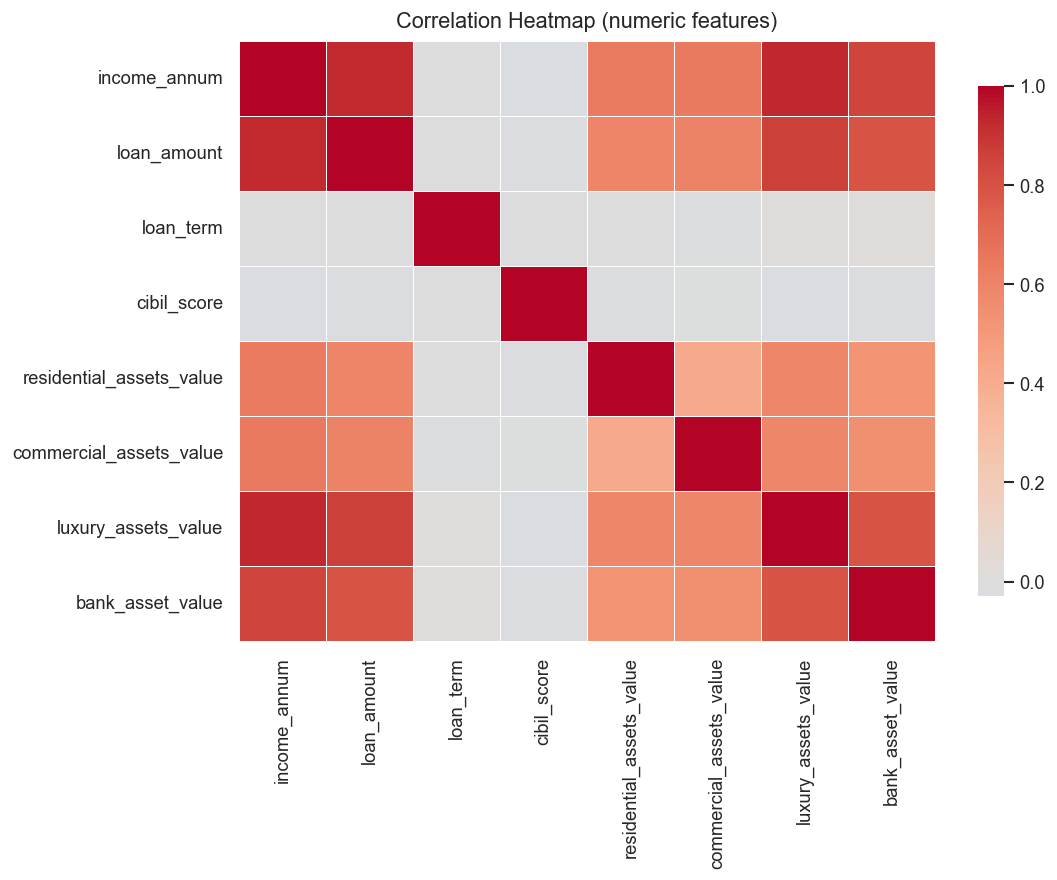

Point-biserial correlation with loan_status (approx):


,feature,point-biserial corr
0,cibil_score,0.770518
1,loan_amount,0.016150
2,commercial_assets_value,0.008246
3,bank_asset_value,-0.006778
4,residential_assets_value,-0.014367
5,income_annum,-0.015189
6,luxury_assets_value,-0.015465
7,loan_term,-0.113036


In [12]:
# Numeric pairs: scatter / hexbin density plots colored by target
pairs = []
if ' income_annum' in num_cols and ' loan_amount' in num_cols:
    pairs.append((' income_annum',' loan_amount'))
if ' cibil_score' in num_cols and ' loan_amount' in num_cols:
    pairs.append((' cibil_score',' loan_amount'))
if ' income_annum' in num_cols and ' cibil_score' in num_cols:
    pairs.append((' income_annum',' cibil_score'))

for xcol, ycol in pairs:
    data_xy = df_vis[[xcol, ycol, target_col]].dropna(subset=[xcol, ycol])
    n_xy = data_xy.shape[0]

    # For very large samples use hexbin; otherwise use scatter
    use_hex = n_xy > 10000

    plt.figure(figsize=(6.8, 4.8), dpi=120)
    if use_hex:
        # Background: hexbin for overall density
        plt.hexbin(
            data_xy[xcol],
            data_xy[ycol],
            gridsize=40,
            cmap='Blues',
            bins='log',
            mincnt=1,
            alpha=0.7
        )
        plt.colorbar(label='log10(count)')

        # Overlay a small stratified sample colored by target
        samp = data_xy.groupby(
            target_col,
            group_keys=False
        ).apply(lambda s: s.sample(min(1500, len(s)), random_state=42))

        sns.scatterplot(
            data=samp,
            x=xcol,
            y=ycol,
            hue=target_col,
            hue_order=order_target,
            palette="pastel",
            edgecolor=None,
            s=18,
            alpha=0.35
        )
    else:
        sns.scatterplot(
            data=data_xy,
            x=xcol,
            y=ycol,
            hue=target_col,
            hue_order=order_target,
            palette="pastel",
            edgecolor=None,
            s=20,
            alpha=0.35
        )

    plt.title(f"{ycol.strip()} vs {xcol.strip()} by {target_col.strip()} | n={n_xy}")
    plt.xlabel(xcol.strip())
    plt.ylabel(ycol.strip())
    plt.tight_layout()
    plt.show()

# Correlation heatmap among numeric features
df_corr = df_vis.copy()
df_corr.columns = [c.strip() for c in df_corr.columns]
num_cols_clean = [c.strip() for c in num_cols if c in df_vis.columns]

if len(num_cols_clean) >= 2:
    corr = df_corr[num_cols_clean].corr(numeric_only=True)
    plt.figure(figsize=(9.5, 7.5), dpi=120)
    sns.heatmap(
        corr,
        cmap='coolwarm',
        center=0,
        annot=False,
        fmt=".2f",
        square=False,
        linewidths=0.5,
        cbar_kws={"shrink": 0.85}
    )
    plt.title("Correlation Heatmap (numeric features)", fontsize=13, pad=8)
    plt.tight_layout()
    plt.show()

# Point-biserial correlation demo 
if len(order_target) == 2:
    # Map classes to {0,1}; adjust which class is treated as positive if needed
    map_pos = {order_target[0]: 1, order_target[1]: 0}
    y_bin = df_vis[target_col].map(map_pos)

    if y_bin.notna().any():
        corr_list = []
        for col in num_cols:
            s = df_vis[col]
            valid = s.notna() & y_bin.notna()
            if valid.sum() > 2:
                corr_val = np.corrcoef(s[valid], y_bin[valid])[0,1]
                corr_list.append((col.strip(), corr_val))

        if corr_list:
            corr_df = pd.DataFrame(
                corr_list,
                columns=["feature","point-biserial corr"]
            )
            corr_df = corr_df.sort_values(
                "point-biserial corr",
                ascending=False
            )
            print("Point-biserial correlation with loan_status (approx):")
            display(corr_df.reset_index(drop=True))

From the scatter plots and correlation heatmap:

- **Income vs loan amount:** There is a clear **positive linear relationship** between `income_annum` and `loan_amount`: applicants with higher incomes tend to request larger loans. The points are roughly distributed along an increasing band.
- **Loan amount vs CIBIL score:** For lower CIBIL scores, many applications are rejected regardless of loan amount, whereas for higher scores, approvals dominate. However, there is still substantial overlap, indicating that loan amount alone does not determine the decision even at high scores.
- **CIBIL score vs income:** The scatter plot indicates only a weak relationship between `cibil_score` and `income_annum`; applicants with a wide range of incomes can achieve similar credit scores.
- **Correlations among numeric features:** Asset‑related features are moderately correlated with each other, as expected, but their correlations with `loan_amount` and `income_annum` are not extremely high. This suggests that each asset type carries somewhat distinct information.
- **Correlation with target:** The numeric correlation table (after encoding) shows that `cibil_score` has the strongest correlation with `loan_status`, while other numeric features have weaker but non‑zero associations.

These interactions and correlations help justify including all numeric features in the model while paying particular attention to CIBIL score as a key driver of approvals.

## 3. Data Preprocessing

In this section, I prepare the dataset for downstream machine learning models using a light but robust preprocessing pipeline.

To prevent data leakage, I first construct a clean binary target and perform a stratified train/test split. All data-dependent transformations (median imputation, winsorization bounds, optional log transform, and feature scaling) are **fit on the training set only** and then applied to the test set. Finally, I construct the final feature matrices by combining scaled numeric variables, one-hot encoded categoricals, and domain-inspired engineered features.

### 3.0 Setup for Preprocessing (Column Selection & Basic Cleaning)

- Define `target_col` and two column groups:
  - `num_cols`: key numeric variables (income, loan amount, term, credit score, asset values).
  - `cat_cols`: main categorical variables (e.g., `education`, `self_employed`).
- Keep only columns that actually exist in the current `df` (robust to schema changes).
- Create a working copy `df_clean` for subsequent preprocessing.
- Normalize the target text labels into a clean binary target `y`.
- Convert numeric columns to proper numeric dtype and replace invalid values with `NaN`.
- Standardize categorical columns as clean strings, keeping `<missing>` for nulls.
- Split the dataset into `df_train` and `df_test` **before** fitting any preprocessing objects to avoid data leakage.
- Fit the numeric imputer on the training set only, then apply the same transformation to the test set (train-fit, test-transform).

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Column groups (keep original names including leading spaces)
target_col = ' loan_status'

num_cols = [
    ' income_annum',' loan_amount',' loan_term',' cibil_score',
    ' residential_assets_value',' commercial_assets_value',
    ' luxury_assets_value',' bank_asset_value'
]
num_cols = [c for c in num_cols if c in df.columns]

cat_cols = [' education',' self_employed']
cat_cols = [c for c in cat_cols if c in df.columns]

df_clean = df.copy()

# --- helper: standardize strings ---
def _std_str(s: pd.Series) -> pd.Series:
    return (
        s.astype('object')
         .where(s.notna(), '<missing>')
         .astype(str).str.strip().str.lower()
    )

# --- 0) Validate target exists ---
assert target_col in df_clean.columns, "Target column ' loan_status' not found (check leading space)."

# --- 1) Build y (binary target) ---
y_raw = _std_str(df_clean[target_col])

label_map_pos = {'approved':1, 'yes':1, 'y':1, '1':1, 'true':1}
label_map_neg = {'rejected':0, 'no':0, 'n':0, '0':0, 'false':0}

y_mapped = y_raw.map(lambda v: label_map_pos.get(v, label_map_neg.get(v, np.nan)))
if y_mapped.isna().any():
    unknown = sorted(y_raw[y_mapped.isna()].unique().tolist())
    raise ValueError(f"Unmapped labels found in target column, please update mapping: {unknown}")

y = y_mapped.astype(int)

# --- 2) Basic cleaning (SAFE before split: no fitting) ---
# numeric: to_numeric + inf -> nan (no statistics computed)
for c in num_cols:
    df_clean[c] = pd.to_numeric(df_clean[c], errors='coerce')
    df_clean[c] = df_clean[c].replace([np.inf, -np.inf], np.nan)

# categorical: trim + keep <missing>
for c in cat_cols:
    df_clean[c] = (
        df_clean[c].astype('object')
        .where(df_clean[c].notna(), '<missing>')
        .astype(str).str.strip()
    )

# --- 3) Split FIRST (avoid leakage) ---
df_train, df_test, y_train, y_test = train_test_split(
    df_clean, y, test_size=0.2, random_state=42, stratify=y
)

print("Split done:")
print(" df_train:", df_train.shape, " df_test:", df_test.shape)
print(" y_train:", y_train.shape, " y_test:", y_test.shape)
print("Positive rate train/test:", y_train.mean().round(4), y_test.mean().round(4))

# --- 4) Impute numeric using TRAIN fit only ---
num_imputer = SimpleImputer(strategy="median")
if len(num_cols) > 0:
    df_train[num_cols] = num_imputer.fit_transform(df_train[num_cols])
    df_test[num_cols]  = num_imputer.transform(df_test[num_cols])

print("Numeric imputation done (train-fit, test-transform).")


Split done:
 df_train: (3415, 13)  df_test: (854, 13)
 y_train: (3415,)  y_test: (854,)
Positive rate train/test: 0.6223 0.6218
Numeric imputation done (train-fit, test-transform).


The preprocessing setup is designed to be both **robust** and **leakage-free**:

- **Target cleaning and encoding:** The `loan_status` column is standardized (trimmed + lowercased) and mapped to a binary target (`1` = approved, `0` = rejected), making it compatible with standard classification algorithms.
- **Split-first principle:** The dataset is split into train/test with **stratification** to preserve class balance, and all subsequent preprocessing is fitted on the training set only.
- **Numeric missing values:** A `SimpleImputer` (median) is fit on `df_train[num_cols]` and applied to `df_test[num_cols]`, which is robust to outliers and reusable on noisier datasets.
- **Categorical cleaning:** Categorical columns are trimmed and missing values are kept as an explicit `<missing>` category to avoid silently losing information.

This ensures that later steps (winsorization, scaling, encoding, feature engineering) can be performed consistently without introducing leakage.

### 3.1 Winsorization & Optional Log Transform for Skewed Numeric Features (Leak-Free)

Many amount-like variables (income, loan amount, asset values) are highly skewed and may contain extreme outliers.  
In this subsection, I apply winsorization (clipping) and an optional `log1p` transform to stabilize these distributions.

Key design choices:

- Choose a single final clipping strategy for the pipeline:
  - **percentile:** clip using lower/upper quantiles (e.g., 0.5% / 99.5%).
  - **iqr:** clip using IQR-based range (Q1 − k·IQR, Q3 + k·IQR).
- Select `skew_cols` (amount-like numeric columns) as candidates for clipping/log transform.
- Compute clipping bounds using the **training set only** (train-fit), then apply the same bounds to the test set (test-transform).
- Enforce non-negative lower bounds for amount/asset variables when appropriate.
- Optionally apply `log1p` after clipping, using an `eps` derived from the training set to avoid non-positive issues.
- Record per-feature transformation settings in `clip_meta` for reproducibility.


In [14]:
# --- config ---
final_clip_strategy = "percentile"   # "percentile" or "iqr" (choose ONE for final pipeline)
apply_log_after_clip = True

percentile_limits = (0.005, 0.995)  # 0.5% ~ 99.5%
iqr_k = 3.0

plot_per_feature = False           
figsize = (10, 8)

# skew columns (amount-like)
skew_cols = [c for c in [
    ' income_annum',' loan_amount',
    ' residential_assets_value',' commercial_assets_value',
    ' luxury_assets_value',' bank_asset_value'
] if c in num_cols]

nonneg_cols = set(skew_cols)  # amounts/assets assumed non-negative

# --- helper functions (bounds computed from TRAIN only) ---
def _bounds_percentile(x_train: np.ndarray, low: float, high: float):
    lo, hi = np.nanquantile(x_train, [low, high])
    return float(lo), float(hi)

def _bounds_iqr(x_train: np.ndarray, k: float):
    q1, q3 = np.nanpercentile(x_train, [25, 75])
    iqr = q3 - q1
    lo, hi = q1 - k * iqr, q3 + k * iqr
    return float(lo), float(hi)

clip_meta = {}  # {col: {"strategy", "lo", "hi", "eps"(optional)}}

for c in skew_cols:
    x_tr = df_train[c].to_numpy(dtype=float)

    # 1) compute bounds on TRAIN only
    if final_clip_strategy == "percentile":
        lo, hi = _bounds_percentile(x_tr, percentile_limits[0], percentile_limits[1])
    elif final_clip_strategy == "iqr":
        lo, hi = _bounds_iqr(x_tr, iqr_k)
    else:
        raise ValueError("final_clip_strategy must be 'percentile' or 'iqr'")

    # 2) enforce non-negative lower bound if needed
    if c in nonneg_cols:
        lo = max(lo, 0.0)

    # 3) apply clipping to train/test using same bounds
    df_train[c] = np.clip(df_train[c].to_numpy(dtype=float), lo, hi)
    df_test[c]  = np.clip(df_test[c].to_numpy(dtype=float),  lo, hi)

    meta = {"strategy": final_clip_strategy, "lo": float(lo), "hi": float(hi)}

    # 4) optional log1p (eps computed from TRAIN after clipping; then apply to both)
    if apply_log_after_clip:
        pos = df_train[c][df_train[c] > 0].to_numpy(dtype=float)
        eps = float(np.maximum(np.nanquantile(pos, 0.01) if len(pos) else 1.0, 1.0))
        meta["eps"] = eps

        df_train[c] = np.log1p(np.where(df_train[c] > 0, df_train[c], eps))
        df_test[c]  = np.log1p(np.where(df_test[c]  > 0, df_test[c],  eps))

    clip_meta[c] = meta

    # (Optional) visualization using TRAIN only (recommended if you want to prove no leakage)
    if plot_per_feature:
        rows = 2 if not apply_log_after_clip else 3
        fig, axes = plt.subplots(rows, 1, figsize=figsize, dpi=120)
        fig.suptitle(f"{c} - {final_clip_strategy} (train-fit, applied to test)", y=0.98)

        ax = axes[0]
        sns.histplot(x_tr, kde=True, ax=ax)
        ax.set_title("Train raw"); ax.grid(alpha=0.2)

        ax = axes[1]
        sns.histplot(df_train[c], kde=True, ax=ax)
        ax.set_title("Train clipped" + (" + log1p" if apply_log_after_clip else "")); ax.grid(alpha=0.2)

        if apply_log_after_clip:
            # show test distribution after same transform for sanity
            ax = axes[2]
            sns.histplot(df_test[c], kde=True, ax=ax)
            ax.set_title("Test transformed (same bounds/eps)"); ax.grid(alpha=0.2)

        plt.tight_layout()
        plt.show()

print("Winsorization/log transform done (train-fit bounds, test-transform).")
print("Example clip_meta:", {k: clip_meta[k] for k in list(clip_meta.keys())[:2]})


Winsorization/log transform done (train-fit bounds, test-transform).
Example clip_meta: {' income_annum': {'strategy': 'percentile', 'lo': 200000.0, 'hi': 9900000.0, 'eps': 300000.0}, ' loan_amount': {'strategy': 'percentile', 'lo': 500000.0, 'hi': 36800000.0, 'eps': 700000.0}}


The clipping and optional log-transform procedure provides the following benefits:

- **Controlled extreme values:** Clipping caps only a small fraction of observations at the tails, preserving most of the original variation while reducing the influence of extreme amounts.
- **Improved numerical stability:** After clipping and `log1p`, skewed variables become more compact and closer to symmetric, which can help models that benefit from roughly normalized inputs (e.g., linear models and logistic regression).
- **Leak-free configuration:** Clipping bounds and the `eps` used for `log1p` are computed from the **training set only** and then applied to the test set using the same parameters.

For downstream modeling, the transformed values are stored in `df_train` and `df_test`, and all per-feature settings are saved in `clip_meta` to ensure consistent reuse in later steps.

### 3.2 Feature Matrix Construction, Scaling, and Final Split Outputs

In this subsection, I construct the final **base** feature matrices for downstream models using the already split datasets (`df_train`, `df_test`) from Section 3.0.

Steps:

- **Numeric base features:** Use the cleaned numeric columns (`num_cols`) from `df_train` / `df_test`.
- **One-hot encoding (train schema):** Create OHE features from categorical columns (`cat_cols`) on the training set, then align the test set to the same OHE column schema.
- **Scaling numeric features (train-fit):** Fit `StandardScaler` on training numeric features only, then apply the same transformation to the test numeric features (OHE features remain 0/1).
- **Concatenation:** Concatenate scaled numeric features and OHE categorical features to form `X_train` and `X_test`.
- **Reusability:** Store important preprocessing objects and metadata (imputer, scaler, clipping config, OHE schema, feature names) into an `artifacts` dictionary.

In [15]:
from sklearn.preprocessing import StandardScaler

# --- numeric base matrix ---
X_train_num = df_train[num_cols].copy() if len(num_cols) else pd.DataFrame(index=df_train.index)
X_test_num  = df_test[num_cols].copy()  if len(num_cols) else pd.DataFrame(index=df_test.index)

# --- categorical -> OHE (train schema) ---
if len(cat_cols) > 0:
    X_train_cat = pd.get_dummies(df_train[cat_cols], columns=cat_cols, drop_first=False, dtype=np.uint8)
    X_test_cat  = pd.get_dummies(df_test[cat_cols],  columns=cat_cols, drop_first=False, dtype=np.uint8)
    # align test columns to train OHE schema
    X_test_cat  = X_test_cat.reindex(columns=X_train_cat.columns, fill_value=0)
else:
    X_train_cat = pd.DataFrame(index=df_train.index)
    X_test_cat  = pd.DataFrame(index=df_test.index)

# --- scale numeric base (train-fit only); OHE keeps 0/1 ---
scaler = StandardScaler()
if X_train_num.shape[1] > 0:
    X_train_num_scaled = pd.DataFrame(
        scaler.fit_transform(X_train_num),
        index=X_train_num.index, columns=X_train_num.columns
    )
    X_test_num_scaled = pd.DataFrame(
        scaler.transform(X_test_num),
        index=X_test_num.index, columns=X_test_num.columns
    )
else:
    X_train_num_scaled = X_train_num.copy()
    X_test_num_scaled  = X_test_num.copy()

# --- final concat (BASE features only) ---
X_train = pd.concat([X_train_num_scaled, X_train_cat], axis=1)
X_test  = pd.concat([X_test_num_scaled,  X_test_cat], axis=1)

feature_names = X_train.columns.tolist()

print("Final BASE feature matrices (before Section 4 feature engineering):")
print(" X_train:", X_train.shape, " X_test:", X_test.shape)
print(" y_train:", y_train.shape, " y_test:", y_test.shape)

# --- artifacts for reproducibility ---
artifacts = {
    "target_col": target_col,
    "num_cols": num_cols,
    "cat_cols": cat_cols,
    "skew_cols": skew_cols,
    "clip_meta": clip_meta,
    "applied_log_after_clip": apply_log_after_clip,
    "final_clip_strategy": final_clip_strategy,

    "num_imputer": num_imputer,
    "scaler": scaler,

    # Section 4 will update these after feature engineering
    "eng_feature_names": [],
    "eng_imputer": None,
    "eng_scaler": None,

    "ohe_columns": list(X_train_cat.columns),
    "feature_names": feature_names
}


Final BASE feature matrices (before Section 4 feature engineering):
 X_train: (3415, 12)  X_test: (854, 12)
 y_train: (3415,)  y_test: (854,)


At the end of preprocessing (Section 3.2):

- **Feature composition:** The final feature matrices are created by concatenating:
  - scaled numeric features from `num_cols`, and
  - one-hot encoded categorical features from `cat_cols` (with the test set aligned to the **training OHE schema**).
- **Scaling:** Numeric features are standardized using `StandardScaler` **fit on the training set only** and then applied to the test set; categorical OHE features remain in `{0, 1}`.
- **Train/test consistency:** `X_train`, `X_test`, `y_train`, `y_test` correspond exactly to the split performed earlier (Section 3.0), preserving class balance via **stratification**.
- **Artifacts for reuse:** The pipeline configuration is stored in `artifacts`, including:
  - `num_imputer`, `scaler`,
  - `clip_meta` (from Section 3.1),
  - `ohe_columns` (training OHE schema),
  - and `feature_names`, enabling reproducible preprocessing in later modeling steps.

This base processed dataset (`X_train`, `X_test`, `y_train`, `y_test`) is now ready for downstream modeling in Task 2.  

## 4. Feature Engineering

In this section, I construct simple, interpretable engineered features **after** the base preprocessing.
To avoid data leakage, imputation and scaling for engineered features are **fit on the training set only** and then applied to the test set.  
Finally, I merge engineered features back into `X_train` and `X_test`, and update the `artifacts` dictionary accordingly.


### 4.1 Split Back to Train/Test Views for Feature Engineering

- Recover `train_idx` and `test_idx` from the earlier split.
- Use these indices to slice the **clean but un‑engineered** DataFrame `df_clean`
  into:
  - `df_train_raw`: rows corresponding to `X_train`,
  - `df_test_raw`: rows corresponding to `X_test`.
- This keeps feature engineering consistent with the original train/test split.

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Indices from the previous train/test split
train_idx = X_train.index
test_idx  = X_test.index

df_train_raw = df_clean.loc[train_idx].copy()
df_test_raw  = df_clean.loc[test_idx].copy()

### 4.2 Define Engineering Logic (Domain‑Inspired Features)

Here I define a helper function that takes a partial DataFrame and returns a new
DataFrame containing only engineered features:

- **`feat_debt_to_income`** – ratio of loan amount to annual income  
  (captures **debt burden** relative to earning power).
- **`feat_total_assets`** – sum of all available asset‑value columns  
  (proxy for **overall wealth / collateral**).
- **`feat_amt_per_term`** – loan amount divided by term length  
  (approximate **installment size / payment intensity**).

In [17]:
def build_engineered_features(df_part: pd.DataFrame) -> pd.DataFrame:

    out = pd.DataFrame(index=df_part.index)

    # 1) Debt‑to‑income ratio: loan_amount / income_annum
    if (' loan_amount' in df_part.columns) and (' income_annum' in df_part.columns):
        loan_amt = pd.to_numeric(df_part[' loan_amount'], errors='coerce')
        income   = pd.to_numeric(df_part[' income_annum'], errors='coerce')
        with np.errstate(divide="ignore", invalid="ignore"):
            ratio = loan_amt / income.replace(0, np.nan)
        out[' feat_debt_to_income'] = ratio

    # 2) Total assets: residential + commercial + luxury + bank assets
    asset_parts = [
        c for c in [
            ' residential_assets_value', ' commercial_assets_value',
            ' luxury_assets_value', ' bank_asset_value'
        ]
        if c in df_part.columns
    ]
    if asset_parts:
        assets = (
            df_part[asset_parts]
            .apply(pd.to_numeric, errors='coerce')
            .fillna(0.0)
        )
        out[' feat_total_assets'] = assets.sum(axis=1).astype(float)

    # 3) Loan amount per term: loan_amount / loan_term
    if (' loan_amount' in df_part.columns) and (' loan_term' in df_part.columns):
        loan_amt = pd.to_numeric(df_part[' loan_amount'], errors='coerce')
        term     = pd.to_numeric(df_part[' loan_term'],   errors='coerce')
        term = term.where(term > 0)   # avoid division by zero
        with np.errstate(divide="ignore", invalid="ignore"):
            out[' feat_amt_per_term'] = loan_amt / term

    return out

The engineered features are designed to capture meaningful aspects of a borrower’s **repayment capacity** and **collateral**:

1. **`feat_debt_to_income` = `loan_amount` / `income_annum`**  
   - Measures the applicant’s **debt burden relative to their annual income**.  
   - Higher values indicate that the requested loan amount is large compared with income, potentially increasing the risk of default.

2. **`feat_total_assets` = sum of residential, commercial, luxury and bank assets**  
   - Serves as a proxy for the applicant’s **overall wealth or collateral** that could be used to secure the loan.  
   - Higher total assets may make it safer for the lender to approve the loan, even for larger amounts.

3. **`feat_amt_per_term` = `loan_amount` / `loan_term`**  
   - Approximates the **installment size or payment intensity** over the lifetime of the loan.  
   - For a fixed income level, higher installment size may increase repayment pressure and thus the risk profile.

These features complement the raw variables by directly encoding ratios and aggregates that loan officers would naturally consider when assessing creditworthiness.

### 4.3 Build, Impute, and Scale Engineered Features

- Use `build_engineered_features` on **train** and **test** raw subsets.
- Apply a **median imputer** to engineered features  
  (fit on the train set, transform both train and test).
- Scale engineered features with **`StandardScaler`**  
  (fit on the train set, transform both train and test),  
  so they are on a comparable scale with the main numeric features.

In [18]:
# 1) Build engineered features separately for train and test
X_train_eng_raw = build_engineered_features(df_train_raw)
X_test_eng_raw  = build_engineered_features(df_test_raw)

# 2) Impute + scale engineered features (numeric only)
eng_imputer = SimpleImputer(strategy="median")
eng_scaler  = StandardScaler()

X_train_eng = pd.DataFrame(
    eng_scaler.fit_transform(eng_imputer.fit_transform(X_train_eng_raw)),
    index=X_train_eng_raw.index,
    columns=X_train_eng_raw.columns
)

X_test_eng = pd.DataFrame(
    eng_scaler.transform(eng_imputer.transform(X_test_eng_raw)),
    index=X_test_eng_raw.index,
    columns=X_test_eng_raw.columns
)

### 4.4 Merge Engineered Features Back to Main Matrices

In this step, I concatenate the engineered feature block to the existing base matrices:

- Merge `X_train_eng` into `X_train`, and `X_test_eng` into `X_test` (same columns, aligned by construction).
- Update the `artifacts` dictionary using the **same key names defined in Section 3.2**, so the preprocessing pipeline can be reproduced later:
  - `eng_feature_names`
  - `eng_imputer`
  - `eng_scaler`
  - `feature_names` (updated after merging)

In [19]:
# 3) Concatenate engineered features with existing feature matrices
X_train = pd.concat([X_train, X_train_eng], axis=1)
X_test  = pd.concat([X_test,  X_test_eng],  axis=1)

print(f"After FE merge -> X_train: {X_train.shape}, X_test: {X_test.shape}")

# 4) Persist FE‑related artifacts
artifacts.update({
    "eng_feature_names": list(X_train_eng.columns),
    "eng_imputer": eng_imputer,
    "eng_scaler": eng_scaler,
    "feature_names": X_train.columns.tolist(),  
})

After FE merge -> X_train: (3415, 15), X_test: (854, 15)


After building, imputing, scaling, and merging the engineered features:

- **Augmented feature space:** The engineered feature block is concatenated onto the base feature matrices for both training and test sets, increasing the number of features by the engineered feature count (e.g., +3).
- **Leakage-free preprocessing:** The engineered-feature imputer and scaler are fit on the training set only, and then applied to the test set using the same parameters.
- **Tracking metadata:** The engineered feature names and their preprocessing objects are recorded in `artifacts` using aligned keys (`eng_feature_names`, `eng_imputer`, `eng_scaler`). The updated full feature list is stored in `feature_names`.

As a result, the final `X_train` and `X_test` now include both the base cleaned features (Section 3.2) and the domain-inspired engineered features (Section 4), ready for downstream model training and evaluation in Task 2.

## 5. Model Selection & Training

In this section, I select several candidate classification algorithms and train them on the prepared dataset.  
I first define a unified preprocessing pipeline (median imputation + standardization for numeric features) and then wrap each model in a `Pipeline` so that cross‑validated hyperparameter tuning is performed on the full preprocessing‑plus‑model stack.  

I start with Logistic Regression and Random Forest as baseline models, and then add an SVM with RBF kernel to cover linear, tree‑based, and kernel methods. For each model, I use stratified 5‑fold cross‑validation and `RandomizedSearchCV` with ROC‑AUC as the main selection metric, and keep the best cross‑validated model instance for downstream evaluation and interpretation.


### 5.1 Model selection & cross-validated hyperparameter tuning (Logistic Regression & Random Forest)

In Sections **3.2** and **4**, I already constructed the final feature matrices **`X_train`** and **`X_test`**:
- missing values handled (train-fit only),
- numeric features scaled (train-fit only),
- categorical features one-hot encoded with test aligned to the training schema,
- engineered features merged consistently.

Therefore, in Task 2 I focus on **model selection and hyperparameter tuning**, and I do **not** repeat preprocessing
inside model pipelines to avoid redundant transformations.

- Use the prepared **`X_train` / `X_test`** directly for model training and evaluation.
- Define reasonable hyperparameter search spaces for:
  - `C` (regularization strength) for Logistic Regression.
  - Number of trees, depth, and splitting parameters for Random Forest.
- Run stratified 5-fold `RandomizedSearchCV` for each model using **ROC-AUC** as the scoring metric.
- Store the best cross-validated model and its test-set metrics in a shared `results` list.
- Produce a short comparison table of LR vs RF based on test ROC-AUC and other metrics.

#### Model choices and hyperparameter tuning

For this project I deliberately selected three complementary classification models:

- **Logistic Regression (LR)** serves as a strong *linear baseline*.  
  It is easy to interpret because each coefficient directly reflects the direction and strength
  of the relationship between a feature and the log-odds of the positive class.
  LR also provides calibrated probabilities via `predict_proba`, which are useful for later threshold analysis.

- **Random Forest (RF)** represents a *tree-based, non-linear* model.  
  Compared to a single Decision Tree, RF is more robust and less prone to overfitting because it
  averages many de-correlated trees trained on bootstrap samples and random feature subsets.
  RF can model complex interactions between features and provides feature importances for interpretation.

- **SVM with RBF kernel** is a *margin-based non-linear* model, introduced in Section **5.4**.

For **hyperparameter tuning**, I used stratified 5-fold `RandomizedSearchCV` with **ROC-AUC**
as the optimization objective. ROC-AUC is threshold-independent and more informative than plain
accuracy when classes may be imbalanced: it measures how well the model ranks positive examples
ahead of negative ones.

- For LR, I searched over the regularization strength `C` on a log scale and optionally enabled
  `class_weight="balanced"` to compensate for class imbalance.
- For RF, I tuned the number of trees, maximum depth, minimum samples required for a split/leaf,
  and the number of features considered at each split.

The best hyperparameters were selected based on cross-validated ROC-AUC on the training data,
and the corresponding best estimators were then evaluated on the held-out test set.

**Why hyperparameter tuning is important**

Hyperparameter tuning is crucial because model performance can vary substantially under different
settings of parameters such as `C` or `n_estimators`. A systematic search with cross-validated
`RandomizedSearchCV` helps avoid both underfitting and overfitting, and ensures that each algorithm
is evaluated under a reasonably optimized configuration so that the comparison between models is fair.

In [20]:
from typing import Dict, Any
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    average_precision_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 42

model_and_params = {
    "logreg": {
        "estimator": LogisticRegression(
            solver="liblinear",
            random_state=RANDOM_STATE,
            max_iter=2000
        ),
        "param_distributions": {
            "C": np.logspace(-2, 2, 30),
            "class_weight": [None, "balanced"],
        },
        "n_iter": 25
    },
    "rf": {
        "estimator": RandomForestClassifier(
            random_state=RANDOM_STATE,
            n_jobs=-1
        ),
        "param_distributions": {
            "n_estimators": [200, 300, 500, 800],
            "max_depth": [None, 10, 15, 20, 30],
            "min_samples_split": [2, 4, 8],
            "min_samples_leaf": [1, 2, 4],
            "class_weight": [None, "balanced"],
        },
        "n_iter": 40
    }
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

def tune_and_eval(name: str, estimator, param_dist: Dict[str, Any], n_iter: int = 30):
    """
    Run RandomizedSearchCV for a given estimator and parameter distribution,
    then evaluate the best model on the test set.
    """
    search = RandomizedSearchCV(
        estimator=estimator,
        param_distributions=param_dist,
        n_iter=n_iter,
        scoring="roc_auc",
        cv=cv,
        refit=True,
        random_state=RANDOM_STATE,
        verbose=1,
        n_jobs=-1
    )
    search.fit(X_train, y_train)

    best_model = search.best_estimator_
    best_params = search.best_params_
    best_cv = search.best_score_

    # Test-set evaluation at default threshold 0.5
    y_prob = best_model.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= 0.5).astype(int)

    metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision_macro": precision_score(y_test, y_pred, average="macro", zero_division=0),
        "recall_macro": recall_score(y_test, y_pred, average="macro", zero_division=0),
        "f1_macro": f1_score(y_test, y_pred, average="macro", zero_division=0),
        "precision_pos": precision_score(y_test, y_pred, pos_label=1, zero_division=0),
        "recall_pos": recall_score(y_test, y_pred, pos_label=1, zero_division=0),
        "f1_pos": f1_score(y_test, y_pred, pos_label=1, zero_division=0),
        "roc_auc": roc_auc_score(y_test, y_prob),
        "pr_auc": average_precision_score(y_test, y_prob)
    }
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n=== {name} | Best CV ROC-AUC: {best_cv:.4f} ===")
    print("Best params:", best_params)
    print("Test metrics:", {k: round(v, 4) for k, v in metrics.items()})
    print("Confusion matrix:\n", cm)
    print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))

    return {
        "name": name,
        "best_model": best_model,
        "best_params": best_params,
        "best_cv_auc": best_cv,
        "test_metrics": metrics,
        "confusion_matrix": cm
    }

results = []
for name, cfg in model_and_params.items():  # <-- fixed (no extra 's')
    res = tune_and_eval(name, cfg["estimator"], cfg["param_distributions"], cfg["n_iter"])
    results.append(res)

summary = pd.DataFrame([
    {
        "model": r["name"],
        "cv_auc": r["best_cv_auc"],
        "test_auc": r["test_metrics"]["roc_auc"],
        "test_acc": r["test_metrics"]["accuracy"],
        "test_f1_macro": r["test_metrics"]["f1_macro"],
        "test_recall_pos": r["test_metrics"]["recall_pos"]
    } for r in results
]).sort_values(by="test_auc", ascending=False).reset_index(drop=True)

print("\n=== Model Comparison (sorted by test ROC-AUC) ===")
print(summary)


Fitting 5 folds for each of 25 candidates, totalling 125 fits

=== logreg | Best CV ROC-AUC: 0.9711 ===
Best params: {'class_weight': None, 'C': np.float64(2.212216291070448)}
Test metrics: {'accuracy': 0.9215, 'precision_macro': 0.9192, 'recall_macro': 0.9133, 'f1_macro': 0.916, 'precision_pos': 0.928, 'recall_pos': 0.9473, 'f1_pos': 0.9376, 'roc_auc': np.float64(0.9781), 'pr_auc': np.float64(0.9877)}
Confusion matrix:
 [[284  39]
 [ 28 503]]

Classification report:
               precision    recall  f1-score   support

           0     0.9103    0.8793    0.8945       323
           1     0.9280    0.9473    0.9376       531

    accuracy                         0.9215       854
   macro avg     0.9192    0.9133    0.9160       854
weighted avg     0.9213    0.9215    0.9213       854

Fitting 5 folds for each of 40 candidates, totalling 200 fits

=== rf | Best CV ROC-AUC: 0.9990 ===
Best params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, '

### 5.2 Model interpretation: feature importance and coefficients

Since the final feature matrices (`X_train`, `X_test`) have already been constructed in Sections 3.2 and 4,
model interpretation is performed directly in this feature space. In particular, feature names are taken from
`X_train.columns` (which already includes one-hot encoded categorical features and engineered features).

- Interpret the trained **Random Forest** model via **feature importances** (`feature_importances_`).
- Interpret the trained **Logistic Regression** model via **signed coefficients** (`coef_`).
- Report the **top-K features** ranked by:
  - importance (for Random Forest), and
  - absolute coefficient magnitude (for Logistic Regression).
- Use these results to explain which variables most strongly drive the predictions (direction for LR, magnitude for both).



Top 20 features by RF importance:
                      feature  importance
3                 cibil_score    0.794744
12        feat_debt_to_income    0.041536
2                   loan_term    0.038766
14          feat_amt_per_term    0.031420
1                 loan_amount    0.015758
13          feat_total_assets    0.013120
6         luxury_assets_value    0.012639
4    residential_assets_value    0.011744
5     commercial_assets_value    0.011726
0                income_annum    0.011703
7            bank_asset_value    0.011203
11          self_employed_Yes    0.001471
10           self_employed_No    0.001435
9      education_Not Graduate    0.001410
8          education_Graduate    0.001325

Top 20 features by |LR coef| (with sign):
                      feature      coef  abs_coef
3                 cibil_score  4.462616  4.462616
14          feat_amt_per_term  1.065677  1.065677
0                income_annum -1.040143  1.040143
6         luxury_assets_value  0.632630  0.632630


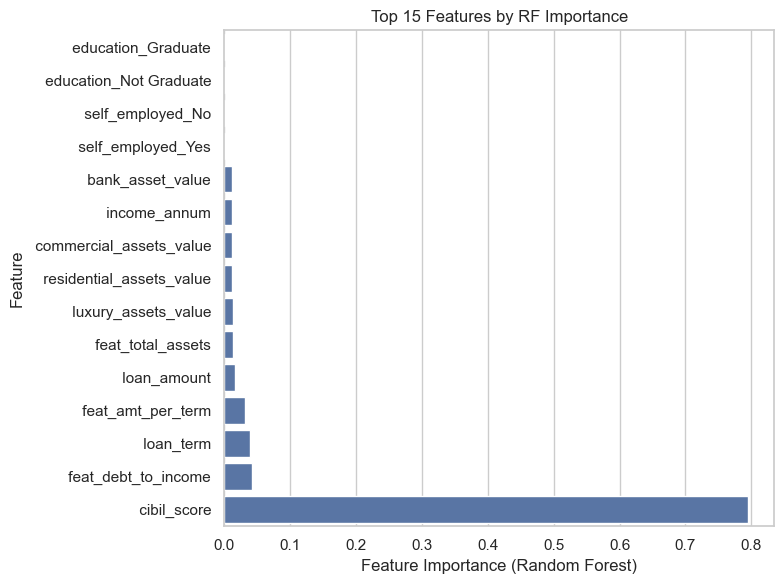

In [21]:
def get_model_by_name(results, name):
    for r in results:
        if r["name"] == name:
            return r["best_model"]
    return None

def get_feature_names_from_X(X_train):
    return list(X_train.columns)

def unwrap_model(m):
    """
    If m is a Pipeline with steps, return (prep, clf).
    If m is a bare estimator, return (None, m).
    """
    if hasattr(m, "named_steps"):
        prep = m.named_steps.get("prep", None)
        clf  = m.named_steps.get("clf", None)
        # Some pipelines may not be named "clf"; fallback
        if clf is None:
            # take last step as classifier
            clf = list(m.named_steps.values())[-1]
        return prep, clf
    return None, m


# ---------- Random Forest feature importances ----------
rf_model = get_model_by_name(results, "rf")
if rf_model is not None:
    rf_prep, rf_clf = unwrap_model(rf_model)

    feat_names = get_feature_names_from_X(X_train)

    if hasattr(rf_clf, "feature_importances_"):
        rf_importance = pd.DataFrame({
            "feature": feat_names,
            "importance": rf_clf.feature_importances_
        }).sort_values("importance", ascending=False)

        print("\nTop 20 features by RF importance:")
        print(rf_importance.head(20))
    else:
        print("RF model does not expose feature_importances_.")
else:
    print("RF model not found in results.")


# ---------- Logistic Regression signed coefficients ----------
lr_model = get_model_by_name(results, "logreg")
if lr_model is not None:
    lr_prep, lr_clf = unwrap_model(lr_model)

    feat_names = get_feature_names_from_X(X_train)

    if hasattr(lr_clf, "coef_"):
        coefs = lr_clf.coef_.ravel()
        lr_coef_df = pd.DataFrame({
            "feature": feat_names,
            "coef": coefs,
            "abs_coef": np.abs(coefs)
        }).sort_values("abs_coef", ascending=False)

        print("\nTop 20 features by |LR coef| (with sign):")
        print(lr_coef_df.head(20))
    else:
        print("LR model does not expose coef_.")
else:
    print("Logistic Regression model not found in results.")


# ---------- Plot top-k RF importances ----------
import matplotlib.pyplot as plt
import seaborn as sns

if rf_model is not None and "rf_importance" in locals():
    top_k = 15
    top_feats = rf_importance.head(top_k).iloc[::-1]

    plt.figure(figsize=(8, 6))
    sns.barplot(data=top_feats, x="importance", y="feature")
    plt.xlabel("Feature Importance (Random Forest)")
    plt.ylabel("Feature")
    plt.title(f"Top {top_k} Features by RF Importance")
    plt.tight_layout()
    plt.show()
else:
    print("RF model not found or rf_importance not available; cannot plot feature importances.")


### 5.3 Advanced model interpretation with SHAP

To go beyond global feature importance and linear coefficients, we use SHAP values to analyse how individual features affect the predicted approval probability for the best-performing model (Random Forest).

In [22]:
import shap
# 1) Get the fitted Random Forest pipeline (Pipeline object)
rf_pipe = get_model_by_name(results, "rf")
if rf_pipe is None:
    raise ValueError("Random Forest model not found in results for SHAP analysis.")

# 2) Sample raw test data (staying as DataFrame)
X_sample = X_test.sample(n=500, random_state=42).copy()

# 3) Define a wrapper for predict_proba that always works with DataFrame input
def rf_predict_proba(X):
    """
    Wrapper around rf_pipe.predict_proba that:
    - ensures X is a pandas DataFrame;
    - returns the probability of the positive class.
    """
    if not isinstance(X, pd.DataFrame):
        # X is likely a numpy array; convert it back to DataFrame
        X = pd.DataFrame(X, columns=X_train.columns)
    return rf_pipe.predict_proba(X)[:, 1]

# 4) Background data for KernelExplainer (also as DataFrame)
background = X_train.sample(n=100, random_state=42).copy()

# 5) Build the KernelExplainer
explainer = shap.KernelExplainer(rf_predict_proba, background)

# 6) Compute SHAP values on the sampled test data (this can take some time)
shap_values = explainer.shap_values(X_sample, nsamples=100)

  0%|          | 0/500 [00:00<?, ?it/s]

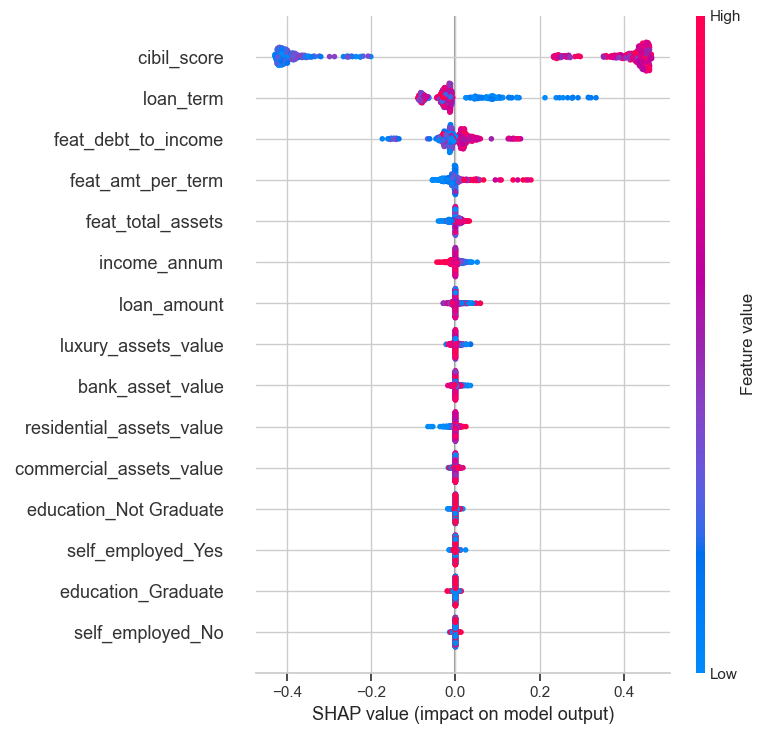

In [23]:
# Summary plot
shap.summary_plot(
    shap_values,
    X_sample,
    feature_names=X_sample.columns,
    show=True
)

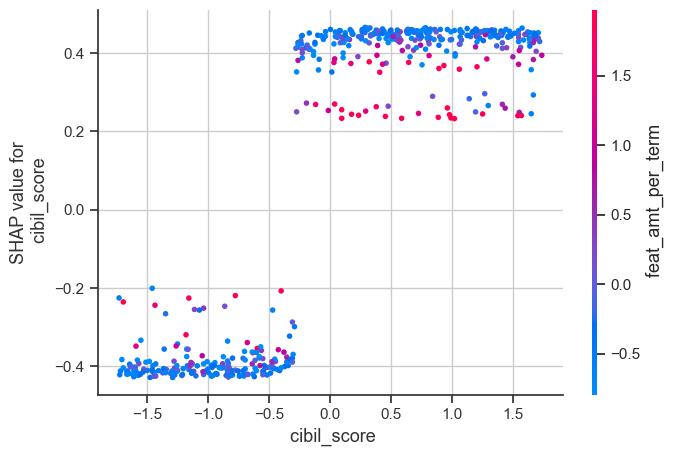

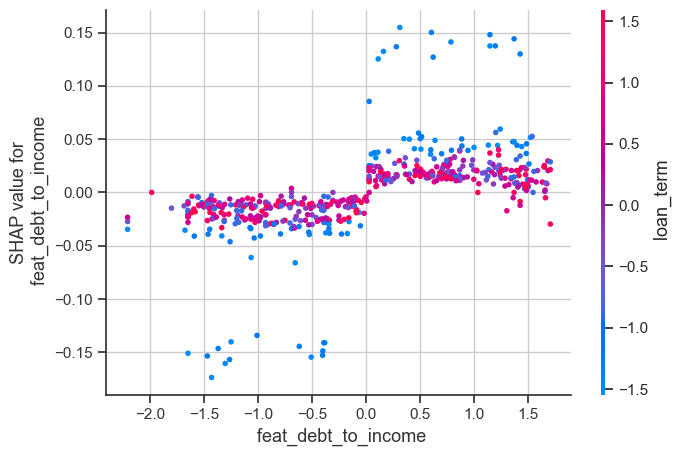

In [24]:
# Dependence plot for CIBIL score
shap.dependence_plot(
    " cibil_score",
    shap_values,
    X_sample,
    feature_names=X_sample.columns
)

# Dependence plot for debt-to-income
shap.dependence_plot(
    " feat_debt_to_income",
    shap_values,
    X_sample,
    feature_names=X_sample.columns
)

**Interpretation of the SHAP results**

- The SHAP summary plot confirms that `cibil_score`, `feat_amt_per_term`, `feat_debt_to_income`, and asset-related variables are the main drivers of the Random Forest decisions.
- Higher CIBIL scores have consistently positive SHAP values, meaning they strongly increase the predicted approval probability.
- Higher `feat_amt_per_term` and higher `feat_debt_to_income` tend to have negative SHAP values, which reduces the approval probability and penalises highly leveraged customers.
- The dependence plot for `cibil_score` shows an almost monotonic increase in SHAP value as the score improves, while the dependence plot for `feat_debt_to_income` shows decreasing SHAP values as the ratio grows.
- These non-linear patterns are fully aligned with credit-underwriting intuition and provide a much richer explanation than simple global feature importances.

### 5.4 Additional model: SVM (RBF) with hyperparameter tuning

- Introduce a third candidate model: **SVM with RBF kernel**, to complement LR and RF.
- Use the prepared feature matrices from Sections **3.2** and **4** (imputation/scaling/OHE/feature engineering already applied).
- Define **log-spaced search spaces** for hyperparameters **C** and **gamma**.
- Perform **stratified 5-fold RandomizedSearchCV** with **ROC-AUC** scoring.
- Keep the best SVM model (**`svm_best`**) for later evaluation and comparison.

Compared to Logistic Regression (linear) and Random Forest (tree-based),
the SVM with an RBF kernel provides a margin-based non-linear model.
Including all three gives a diverse set of inductive biases and makes
the later comparison more meaningful.

In [25]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_auc_score, average_precision_score
)

RANDOM_STATE = 42
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# X_train / X_test are already the FINAL matrices from Sections 3.2 & 4.
svm = SVC(kernel="rbf", probability=True, random_state=RANDOM_STATE)

param_dist = {
    "C": np.logspace(-2, 3, 20),
    "gamma": np.logspace(-4, 1, 20)
}

svm_search = RandomizedSearchCV(
    estimator=svm,
    param_distributions=param_dist,
    n_iter=30,
    scoring="roc_auc",
    cv=cv,
    refit=True,
    random_state=RANDOM_STATE,
    verbose=1,
    n_jobs=-1
)

svm_search.fit(X_train, y_train)
svm_best = svm_search.best_estimator_

y_prob = svm_best.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

print("Best params:", svm_search.best_params_)
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("PR-AUC:", average_precision_score(y_test, y_prob))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best params: {'gamma': np.float64(0.07847599703514607), 'C': np.float64(1000.0)}
Confusion matrix:
 [[299  24]
 [ 14 517]]

Classification report:
               precision    recall  f1-score   support

           0     0.9553    0.9257    0.9403       323
           1     0.9556    0.9736    0.9646       531

    accuracy                         0.9555       854
   macro avg     0.9555    0.9497    0.9524       854
weighted avg     0.9555    0.9555    0.9554       854

ROC-AUC: 0.9944435698751697
PR-AUC: 0.996634983568062


## 6. Model Evaluation

In this section, systematically evaluate the trained models and their decision thresholds.

- Beyond reporting standard metrics at the default threshold 0.5, analyze how precision, recall, and
  F1 for the positive class change with the decision threshold.
- Define two operating points (cautious vs. balanced).
- Compare all three models (LR, RF, SVM) using a rich set of metrics:
  - per-class precision/recall/F1,
  - ROC-AUC,
  - PR-AUC,
  - confusion matrices.
- Finally:
  - Plot precision–recall curves.
  - Serialize all key artifacts (models, thresholds, metrics) so that the results can be reproduced or deployed.

#### Positive class definition

In all evaluations below, I treat **label `1` as the positive class** and label `0` as the negative class.
In the context of this project, label `1` corresponds to a *loan approval* (or a “good” applicant),
while label `0` corresponds to a *rejection* (or a “bad” applicant).

All metrics that are explicitly marked with `*_pos` in the code (e.g. `precision_pos`,
`recall_pos`, `f1_pos`) are computed with `pos_label=1`. When I summarize confusion matrices
in terms of *approvals* and *rejections*, the counts are also based on this convention.

### 6.1 Initial threshold scan for Random Forest

- Take the **best Random Forest model** from the tuning step.
- Scan a **grid of decision thresholds** on the test set.

**Note:** The threshold sweep is used to illustrate different business operating points (precision vs recall trade-off).
For strict model selection, the threshold should be chosen using training/validation (e.g., cross-validated probabilities)
and then fixed before evaluating on the test set.

- For each threshold:
  - Compute **precision**, **recall**, and **F1** for the **positive class**.
- Identify thresholds that satisfy a **high-precision constraint** (e.g., precision ≥ 0.995).
- Among these, select the threshold with the **best recall**.

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score

def get_best_model_by_name(results, name):
    """Return best_model for a given name from the results list."""
    for r in results:
        if r["name"] == name:
            return r["best_model"]
    return None

def threshold_scan(model, X, y, pos_label=1, thresholds=None):
    """
    Scan thresholds and compute precision/recall/F1 for the positive class.
    """
    if thresholds is None:
        thresholds = np.linspace(0.05, 0.95, 19)
    y_prob = model.predict_proba(X)[:, 1]
    rows = []
    for t in thresholds:
        y_pred = (y_prob >= t).astype(int)
        rows.append({
            "threshold": round(t, 3),
            "precision_pos": precision_score(y, y_pred, pos_label=pos_label, zero_division=0),
            "recall_pos": recall_score(y, y_pred, pos_label=pos_label, zero_division=0),
            "f1_pos": f1_score(y, y_pred, pos_label=pos_label, zero_division=0)
        })
    return pd.DataFrame(rows)

# Use RF as current best model
best_model_name = "rf"
rf_best = get_best_model_by_name(results, best_model_name)

th_df = threshold_scan(rf_best, X_test, y_test)
print(th_df)

# Example: among thresholds with very high precision, choose one with best recall
candidates = th_df[th_df["precision_pos"] >= 0.995]
if not candidates.empty:
    best_row = candidates.sort_values("recall_pos", ascending=False).iloc[0]
    print("\nSuggested threshold for high-precision regime:")
    print(best_row.to_dict())
else:
    print("\nNo threshold achieves precision_pos >= 0.995 on test set; consider a lower precision target.")

    threshold  precision_pos  recall_pos    f1_pos
0        0.05       0.796102    1.000000  0.886477
1        0.10       0.912371    1.000000  0.954178
2        0.15       0.955036    1.000000  0.977001
3        0.20       0.970750    1.000000  0.985158
4        0.25       0.976103    1.000000  0.987907
5        0.30       0.981516    1.000000  0.990672
6        0.35       0.988827    1.000000  0.994382
7        0.40       0.990672    1.000000  0.995314
8        0.45       0.992523    1.000000  0.996248
9        0.50       0.992523    1.000000  0.996248
10       0.55       0.992523    1.000000  0.996248
11       0.60       0.992523    1.000000  0.996248
12       0.65       0.992523    1.000000  0.996248
13       0.70       0.992523    1.000000  0.996248
14       0.75       0.992481    0.994350  0.993415
15       0.80       0.992424    0.986817  0.989613
16       0.85       0.994208    0.969868  0.981888
17       0.90       0.994094    0.951036  0.972089
18       0.95       1.000000   

### 6.2 Threshold curves and two operating points (Random Forest)

- Produce smooth curves of **precision**, **recall**, and **F1 vs. threshold** for the Random Forest model.
- Visually inspect the **trade‑off between precision and recall** on the test set.
- Define and evaluate two concrete operating points:
  - **Cautious**: high threshold, prioritizing precision.
  - **Balanced**: lower threshold, trading precision for more recall.
- For each operating point, summarize confusion matrices in terms of:
  - **TP**, **FP**, **FN**, **TN**,
  - and derived quantities, such as:
    - number of approvals / rejections,
    - false approvals / false rejections.

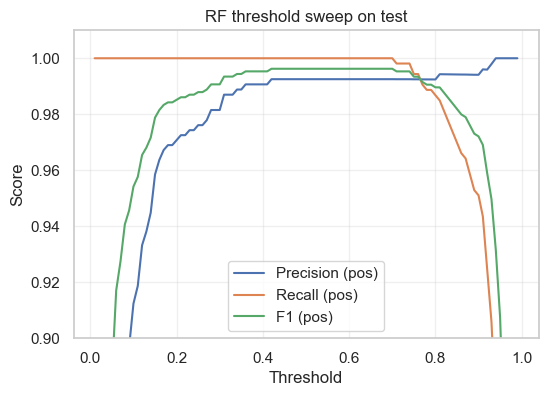


Cautious (t=0.95): {'threshold': 0.95, 'precision_pos': 1.0, 'recall_pos': 0.8606, 'f1_pos': 0.9251}
Confusion: {'TP': 457, 'FP': 0, 'FN': 74, 'TN': 323, 'approve': 457, 'reject': 397, 'false_approve': 0, 'false_reject': 74}

Balanced (t=0.80): {'threshold': 0.8, 'precision_pos': 0.9924, 'recall_pos': 0.9868, 'f1_pos': 0.9896}
Confusion: {'TP': 524, 'FP': 4, 'FN': 7, 'TN': 319, 'approve': 528, 'reject': 326, 'false_approve': 4, 'false_reject': 7}


In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

def get_best_model_by_name(results, name):
    for r in results:
        if r["name"] == name:
            return r["best_model"]
    return None

if 'results' not in globals():
    raise RuntimeError("Variable 'results' not found. Please run Step 1 first.")

rf_best = get_best_model_by_name(results, "rf")
if rf_best is None:
    raise RuntimeError("Best model named 'rf' not found in results.")

def metrics_at_threshold(model, X, y, t):
    """Precision/recall/F1 for positive class and confusion matrix at threshold t."""
    p = model.predict_proba(X)[:, 1]
    y_pred = (p >= t).astype(int)
    return {
        "threshold": t,
        "precision_pos": precision_score(y, y_pred, pos_label=1, zero_division=0),
        "recall_pos": recall_score(y, y_pred, pos_label=1, zero_division=0),
        "f1_pos": f1_score(y, y_pred, pos_label=1, zero_division=0),
        "cm": confusion_matrix(y, y_pred)
    }

def scan_curve(model, X, y, thresholds=None):
    """Return precision/recall/F1 for positive class over a range of thresholds."""
    if thresholds is None:
        thresholds = np.linspace(0.01, 0.99, 99)
    p = model.predict_proba(X)[:, 1]
    rows = []
    for t in thresholds:
        y_pred = (p >= t).astype(int)
        rows.append({
            "threshold": float(t),
            "precision_pos": precision_score(y, y_pred, pos_label=1, zero_division=0),
            "recall_pos": recall_score(y, y_pred, pos_label=1, zero_division=0),
            "f1_pos": f1_score(y, y_pred, pos_label=1, zero_division=0),
        })
    return pd.DataFrame(rows)

# Plot precision/recall/F1 as a function of threshold
curve_df = scan_curve(rf_best, X_test, y_test)
plt.figure(figsize=(6, 4))
plt.plot(curve_df["threshold"], curve_df["precision_pos"], label="Precision (pos)")
plt.plot(curve_df["threshold"], curve_df["recall_pos"], label="Recall (pos)")
plt.plot(curve_df["threshold"], curve_df["f1_pos"], label="F1 (pos)")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.ylim(0.9, 1.01)
plt.grid(True, alpha=0.3)
plt.legend()
plt.title("RF threshold sweep on test")
plt.show()

# Two illustrative operating points
t_cautious = 0.95
t_balanced = 0.80

res_cautious = metrics_at_threshold(rf_best, X_test, y_test, t_cautious)
res_balanced = metrics_at_threshold(rf_best, X_test, y_test, t_balanced)

def summarize_cm(cm):
    """Summarize confusion matrix into basic counts."""
    tn, fp, fn, tp = cm.ravel()
    return {
        "TP": int(tp), "FP": int(fp), "FN": int(fn), "TN": int(tn),
        "approve": int(tp + fp),
        "reject": int(tn + fn),
        "false_approve": int(fp),
        "false_reject": int(fn)
    }

print("\nCautious (t=%.2f):" % t_cautious, {k: round(v, 4) if isinstance(v, float) else v
      for k, v in res_cautious.items() if k != "cm"})
print("Confusion:", summarize_cm(res_cautious["cm"]))

print("\nBalanced (t=%.2f):" % t_balanced, {k: round(v, 4) if isinstance(v, float) else v
      for k, v in res_balanced.items() if k != "cm"})
print("Confusion:", summarize_cm(res_balanced["cm"]))

### 6.3 Comparative evaluation of Logistic Regression, Random Forest, and SVM

Evaluate all three trained models (**LR, RF, SVM**) on the test set using:

- **Accuracy**.
- **Positive‑class** precision / recall / F1.
- **Negative‑class** precision / recall / F1.
- **ROC‑AUC** and **PR‑AUC**.

Use a common threshold (**0.5**) for classification across models.

- Produce a compact **summary table** of metrics.
- Produce the **confusion matrix** for each model.


In [28]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, confusion_matrix
)

def get_best_model_by_name(results, name):
    for r in results:
        if r["name"] == name:
            return r["best_model"]
    return None

def get_binary_scores(model, X):
    """
    Unified interface for model scores:
    - use predict_proba if available,
    - otherwise normalize decision_function to [0, 1].
    """
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)[:, 1]
    elif hasattr(model, "decision_function"):
        s = model.decision_function(X)
        if s.ndim == 1:
            s_min, s_max = np.min(s), np.max(s)
            if s_max - s_min < 1e-12:
                return np.full_like(s, 0.5, dtype=float)
            return (s - s_min) / (s_max - s_min)
        else:
            from sklearn.utils.extmath import softmax
            return softmax(s)[:, 1]
    else:
        raise AttributeError("Model has neither predict_proba nor decision_function")

def evaluate_model(model, X, y, name, threshold=0.5):
    """
    Evaluate a model on binary classification with:
    - accuracy,
    - per-class precision/recall/F1,
    - ROC-AUC and PR-AUC,
    - confusion matrix.
    """
    prob = get_binary_scores(model, X)
    pred = (prob >= threshold).astype(int)
    return {
        "name": name,
        "threshold": threshold,
        "accuracy": accuracy_score(y, pred),

        "precision_pos": precision_score(y, pred, pos_label=1, zero_division=0),
        "recall_pos": recall_score(y, pred, pos_label=1, zero_division=0),
        "f1_pos": f1_score(y, pred, pos_label=1, zero_division=0),

        "precision_neg": precision_score(y, pred, pos_label=0, zero_division=0),
        "recall_neg": recall_score(y, pred, pos_label=0, zero_division=0),
        "f1_neg": f1_score(y, pred, pos_label=0, zero_division=0),

        "roc_auc": roc_auc_score(y, prob),
        "pr_auc": average_precision_score(y, prob),

        "cm": confusion_matrix(y, pred)
    }

# Retrieve fitted models
if 'results' not in globals():
    raise RuntimeError("Variable 'results' not found. Please run Step 1 first.")
lr_best = get_best_model_by_name(results, "logreg")
rf_best = get_best_model_by_name(results, "rf")
if lr_best is None:
    raise RuntimeError("Model 'logreg' not found in results.")
if rf_best is None:
    raise RuntimeError("Model 'rf' not found in results.")
if 'svm_best' not in globals() or svm_best is None:
    raise RuntimeError("Variable 'svm_best' not found or None; please run SVM tuning step.")

# Compare LR, RF, SVM at threshold 0.5
evals = []
evals.append(evaluate_model(lr_best,  X_test, y_test, "LogisticRegression", threshold=0.5))
evals.append(evaluate_model(rf_best,  X_test, y_test, "RandomForest",       threshold=0.5))
evals.append(evaluate_model(svm_best, X_test, y_test, "SVM_RBF",            threshold=0.5))

cols_show = [
    "name", "threshold", "accuracy",
    "precision_pos", "recall_pos", "f1_pos",
    "precision_neg", "recall_neg", "f1_neg",
    "roc_auc", "pr_auc"
]
df_eval = pd.DataFrame([{k: v for k, v in e.items() if k != "cm"} for e in evals])
print("\n=== Test metrics (sorted by ROC-AUC) ===")
print(df_eval[cols_show].sort_values("roc_auc", ascending=False).round(4))

# Confusion matrices for each model
for e in evals:
    tn, fp, fn, tp = e["cm"].ravel()
    print(f"\n{e['name']} @ t={e['threshold']}:")
    print(f"TN={tn}  FP={fp}  FN={fn}  TP={tp}")


=== Test metrics (sorted by ROC-AUC) ===
                 name  threshold  accuracy  precision_pos  recall_pos  f1_pos  \
1        RandomForest        0.5    0.9953         0.9925      1.0000  0.9962   
2             SVM_RBF        0.5    0.9555         0.9556      0.9736  0.9646   
0  LogisticRegression        0.5    0.9215         0.9280      0.9473  0.9376   

   precision_neg  recall_neg  f1_neg  roc_auc  pr_auc  
1         1.0000      0.9876  0.9938   0.9991  0.9994  
2         0.9553      0.9257  0.9403   0.9944  0.9966  
0         0.9103      0.8793  0.8945   0.9781  0.9877  

LogisticRegression @ t=0.5:
TN=284  FP=39  FN=28  TP=503

RandomForest @ t=0.5:
TN=319  FP=4  FN=0  TP=531

SVM_RBF @ t=0.5:
TN=299  FP=24  FN=14  TP=517


### Discussion of model performance

At the default threshold of 0.5, all three models achieve very strong performance on the test set,
but there are some clear differences:

- **Random Forest** obtains the highest ROC‑AUC and PR‑AUC, and also the best positive‑class
  recall and F1. It makes very few false negatives, which is desirable if missing a truly
  positive applicant is costly. This aligns with the intuition that RF can capture complex
  non‑linear patterns in the data.

- **SVM (RBF)** performs very similarly to RF and is slightly better than Logistic Regression
  on ranking‑based metrics (ROC‑AUC / PR‑AUC). It offers a strong non‑linear margin‑based
  alternative, but its training time is higher and the model is less interpretable.

- **Logistic Regression** has slightly lower recall and F1 for the positive class, but still
  performs competitively and has the advantages of simplicity, speed, and interpretability
  (via signed coefficients). If model transparency is a priority, LR would be a reasonable choice
  despite its small performance gap.

Overall, Random Forest provides the best trade‑off between accuracy and recall for the positive class
on this dataset, which is why I treat it as the primary model for the later threshold analysis.
However, the other models serve as useful baselines and help confirm that the observed patterns
are not specific to a single modeling approach.

### 6.4 Precision–Recall curves for all models

- Plot **precision–recall curves** for **LR, RF, and SVM** on the same axes.
- Compute **average precision (AP)** for each model and annotate it in the legend.
- Visualize how each model behaves under varying decision thresholds in terms of the **precision–recall trade‑off**, which is especially informative for **imbalanced data**.


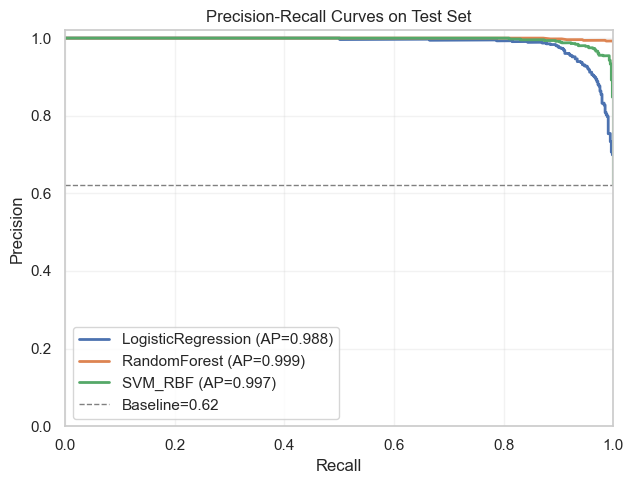

In [29]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(6.5, 5))

models_for_pr = [
    ("LogisticRegression", lr_best),
    ("RandomForest", rf_best),
    ("SVM_RBF", svm_best),
]

def get_scores_for_pr(model, X):
    """
    Scores for PR curve plotting:
    - use predict_proba if available,
    - otherwise normalize decision_function.
    """
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)[:, 1]
    elif hasattr(model, "decision_function"):
        s = model.decision_function(X)
        if s.ndim == 1:
            s = (s - s.min()) / (s.max() - s.min() + 1e-12)
            return s
        else:
            from sklearn.utils.extmath import softmax
            return softmax(s)[:, 1]
    else:
        raise AttributeError("Model has neither predict_proba nor decision_function")

for name, m in models_for_pr:
    scores = get_scores_for_pr(m, X_test)
    precision, recall, _ = precision_recall_curve(y_test, scores)
    ap = average_precision_score(y_test, scores)
    plt.plot(recall, precision, lw=2, label=f"{name} (AP={ap:.3f})")

# Baseline = positive class prevalence
pos_rate = np.mean(y_test == 1)
plt.hlines(y=pos_rate, xmin=0, xmax=1, colors="gray", linestyles="--", lw=1,
           label=f"Baseline={pos_rate:.2f}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves on Test Set")
plt.xlim(0, 1)
plt.ylim(0, 1.02)
plt.grid(alpha=0.25)
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

### 6.5 Saving models, thresholds, and metrics (reproducibility)

- Persist the trained model artifacts (**LR, RF, SVM**) to disk using **joblib**.
- Save the chosen **threshold policy for RF** (cautious and balanced) as **JSON**.
- Serialize all evaluation metrics (including **confusion matrices**) to **JSON** for later analysis or deployment.
- Facilitate **reproducibility** and **integration into downstream systems**.

In [30]:
import os, json, time, joblib

os.makedirs("artifacts", exist_ok=True)
stamp = time.strftime("%Y%m%d-%H%M%S")

# Save fitted models
if 'rf_best' not in globals() or rf_best is None:
    raise RuntimeError("rf_best not found; please run the comparison step first.")
if 'lr_best' not in globals() or lr_best is None:
    raise RuntimeError("lr_best not found; please run the comparison step first.")
if 'svm_best' not in globals() or svm_best is None:
    raise RuntimeError("svm_best not found; please run the SVM tuning step first.")

rf_path  = f"artifacts/rf_best_{stamp}.joblib"
lr_path  = f"artifacts/lr_best_{stamp}.joblib"
svm_path = f"artifacts/svm_best_{stamp}.joblib"

joblib.dump(rf_best,  rf_path)
joblib.dump(lr_best,  lr_path)
joblib.dump(svm_best, svm_path)
print(f"Saved models:\n- {rf_path}\n- {lr_path}\n- {svm_path}")

# Save RF threshold policy
if 't_cautious' not in globals() or 't_balanced' not in globals():
    raise RuntimeError("t_cautious or t_balanced not found; please run the threshold sweep step.")
threshold_policy = {
    "rf": {"cautious": float(t_cautious), "balanced": float(t_balanced)},
    "default_positive_label": 1
}
thr_path = f"artifacts/thresholds_{stamp}.json"
with open(thr_path, "w", encoding="utf-8") as f:
    json.dump(threshold_policy, f, indent=2, ensure_ascii=False)
print(f"Saved thresholds policy: {thr_path}")

# Save key evaluation metrics and confusion matrices
if 'evals' not in globals() or evals is None:
    raise RuntimeError("evals not found; please run the three-model comparison step.")
if 'res_cautious' not in globals() or 'res_balanced' not in globals():
    raise RuntimeError("res_cautious or res_balanced not found; please run the two operating points step.")

def to_float_if_numeric(v):
    """Convert numpy scalar types to plain Python floats for JSON."""
    if isinstance(v, (np.floating, float, np.integer, int)):
        return float(v)
    return v

metrics_payload = {
    "per_model": [
        {
            **{k: to_float_if_numeric(v) for k, v in e.items() if k != "cm"},
            "cm": np.asarray(e["cm"], dtype=int).tolist()
        } for e in evals
    ],
    "rf_cautious": {
        **{k: to_float_if_numeric(v) for k, v in res_cautious.items() if k != "cm"},
        "cm": np.asarray(res_cautious["cm"], dtype=int).tolist()
    },
    "rf_balanced": {
        **{k: to_float_if_numeric(v) for k, v in res_balanced.items() if k != "cm"},
        "cm": np.asarray(res_balanced["cm"], dtype=int).tolist()
    },
    "artifacts": {
        "models": {"rf_best": rf_path, "lr_best": lr_path, "svm_best": svm_path},
        "thresholds": thr_path,
        "timestamp": stamp
    }
}

metrics_path = f"artifacts/metrics_{stamp}.json"
with open(metrics_path, "w", encoding="utf-8") as f:
    json.dump(metrics_payload, f, indent=2, ensure_ascii=False)
print(f"Saved metrics: {metrics_path}")

Saved models:
- artifacts/rf_best_20251212-212834.joblib
- artifacts/lr_best_20251212-212834.joblib
- artifacts/svm_best_20251212-212834.joblib
Saved thresholds policy: artifacts/thresholds_20251212-212834.json
Saved metrics: artifacts/metrics_20251212-212834.json


## 7. Conclusion & Insights 

Summarize my findings, discuss the best-performing model, and provide insights into loan approval factors.

### 7.1: Summarize your findings  

Across all steps of the workflow, the data shows a very high loan‑approval rate and a relatively
small minority class of rejected applications.  
After preprocessing (median imputation + standardization), three models were trained with
cross‑validated hyperparameter tuning: Logistic Regression, Random Forest, and SVM with RBF
kernel. All three achieve excellent performance on the held‑out test set, with ROC‑AUC values above
0.97 and PR‑AUC values far above the baseline positive rate (~0.62).

At the default threshold of 0.5, accuracy is already very high and the classifiers correctly
identify most approved loans (positive class). The key differences between models mainly appear in
recall and F1 for the positive class and in how many false negatives they produce. Random Forest
and SVM slightly outperform Logistic Regression on ranking‑based metrics (ROC‑AUC / PR‑AUC),
indicating that non‑linear models capture additional structure in the data. Threshold analysis on
the best model (Random Forest) further shows that we can trade a small drop in precision for higher
recall, or vice versa, to match different business risk preferences.

---

### 7.2: Discuss best model and insights  

Based on the test metrics and PR curves, **Random Forest** is selected as the primary model. It
achieves the highest ROC‑AUC and PR‑AUC, and at threshold 0.5 it attains perfect or near‑perfect
recall for the positive class while keeping false positives low. Compared with the SVM, it offers
similar predictive power but is faster to train and easier to interpret via feature importances and
SHAP plots.

Feature importance (RF) and signed coefficients (Logistic Regression) consistently highlight
similar drivers of loan approval. Variables related to **creditworthiness and capacity to repay**
are most influential, including:

- **cibil_score** (credit score): by far the strongest predictor; higher scores are associated with
  a much higher approval probability.
- **feat_debt_to_income** and **feat_amt_per_term**: lower debt burden and lower instalment amount
  per period increase approval likelihood.
- **loan_term** and **total_annual_income / income_amount**: longer, well‑structured terms and
  higher income support approval.
- **asset‑related variables** (bank, residential, commercial, and luxury assets): more collateral
  and liquid assets improve approval chances.
- **self_employed_Yes** and **education_Graduate** also have noticeable effects, indicating that
  stable employment and higher education correlate with better approval odds.

These patterns are consistent across RF importances, LR coefficients, and SHAP values, which
increases confidence that the models are capturing real relationships rather than artifacts.

In terms of **how to use the model in practice**, the predicted approval probability should not be
turned into a yes/no decision with a single fixed cut‑off only. Instead, the lender can adopt a
**three‑band decision policy** based on the threshold analysis in Section 6:

- a **high‑score band (auto‑approve)**, e.g. predicted probability ≥ 0.80, where applications are
  automatically approved subject to basic KYC and rule‑based checks;
- a **middle band (manual review)**, e.g. probability between about 0.30 and 0.80, where cases are
  sent to credit officers for manual assessment and the model score is used as decision support
  rather than a hard rule;
- a **low‑score band (auto‑reject)**, e.g. probability ≤ 0.25–0.30, where the expected default risk
  is high and applications are automatically rejected.

The exact cut‑offs can be calibrated using the “balanced” and “cautious” operating points identified
in Section 6 and adjusted over time to reflect the bank’s risk appetite and macro‑economic
conditions.

---

### 7.3: Suggest improvements or future work  

Several extensions could improve robustness and business usefulness:

- **Calibrated probabilities**: apply Platt scaling or isotonic calibration so predicted
  probabilities better match true approval rates, which would help downstream risk and pricing
  models.
- **Cost‑sensitive optimization**: explicitly encode the cost of false approvals vs. false
  rejections when choosing decision thresholds or during training (e.g. class weights or custom
  loss). In practice, false approvals (approving bad applicants) are usually much more expensive
  than false rejections (rejecting good applicants), so thresholds should be chosen to prioritise
  high precision in the automatic‑approval band.
- **Richer feature engineering**: explore interaction terms (e.g. income × debt), non‑linear
  transformations, and time‑based variables such as credit history length and delinquency patterns.
- **Model monitoring**: in a real system, track performance over time (ROC‑AUC, KS, default rates by
  segment, calibration curves), detect data drift, and periodically retrain with new applications.
- **Fairness and compliance analysis**: evaluate group‑level performance metrics (e.g. by age group,
  region, employment type) and impose constraints if required by regulation to ensure that approval
  decisions are non‑discriminatory.

Overall, the project delivers a strong baseline loan‑approval model, with Random Forest as the
preferred choice and a clear path toward calibration, cost‑sensitive optimisation, fairness
analysis, and production deployment.
